### Name : Ridopandi Sinaga
### Title : Mobile Price Classification
### Laggle dataset: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
### Problem: Classification

## --------------------------------------------------------------------------------------------------------------------------------------

## Import library yang diperlukan

In [ ]:
import pandas as pd
import os, zipfile, shutil, PIL
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import matplotlib.patches as mpatches

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import scipy.stats as stats

## Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 62.1MB/s]


In [ ]:
#unzip dataset
local_zip = '/content/mobile-price-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Import
data = pd.read_csv('/content/train.csv')

In [ ]:
# Cek keterangan dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#cek statistik dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Pada sc_width and px_height minimum valuenya 0. Artinya ada ketidakcocokan data karena tidak ada ponsel yang lebar nya 0 dan pixel kameranya 0.

In [ ]:
# Cek berapa banyak datum yg memiliki lebar layar  0.
print(data[data['sc_w']==0].shape[0])

180


In [ ]:
#Cek berpa banyak datum px_height bernilai 0.
print(data[data['px_height']==0].shape[0])

2


In [ ]:
# Drop 2 datum dengan px_height=0
data=data[data['px_height']!=0]


Karena kita baru saja ada drop data, kita harus mengatasi missing value, menggunakan algoritma K-nearest neighbors (KNN), untuk menentukan nilai yang paling sesuai menggantikan nilai yang hilang tersebut.

KNNImputer bekerja dengan mengidentifikasi tetangga terdekat dari setiap titik data yang memiliki nilai hilang dan kemudian mengambil nilai yang ada dari tetangga terdekat tersebut. Kemudian, KNNImputer menggunakan nilai-nilai yang diperoleh dari tetangga terdekat tersebut untuk menggantikan nilai yang hilang dalam dataset.


Sebelum menggunakan KNN Imputer kita perlu mengganti 0 dengan nilai NAN.

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
data['sc_w']=data['sc_w'].replace(0,np.nan)

In [ ]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
data=pd.DataFrame(impute_knn.fit_transform(data),columns=data.columns)

In [ ]:
# Checking shape
data.shape

(1998, 21)

In [ ]:
# Checking How many observations having sc_w value as 0.
data[data['sc_w']==0].shape[0]

0

Ketidakcocokan data telah teratasi

# Exploratory Data Anaylsis

In [ ]:
# lets have look at our target variable's counts
price_range_values=data['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

### Plot Data Price Range

<Axes: ylabel='price_range'>

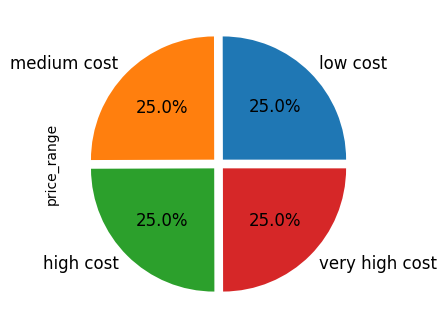

In [ ]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4, labels=labels, autopct='%1.1f%%', figsize=(6,4),fontsize=12)

In [ ]:
price_range_values=data['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

Keterangan:
* 0=low cost,
* 1=medium cost,
* 2=high cost,
* 3=very high cost.

Data hampir seimbang pada setiap kategori harga.Artinya kita tidak perlu standardisasi  atau imbalanced variabel lagi

### Plot RAM vs Price Range

In [ ]:
cs1 = ['#b788ca', '#9771b6', '#7e659f', '#582e67']
labelharga = ["Murah","Menengah Murah","Menegah Mahal","Mahal"]

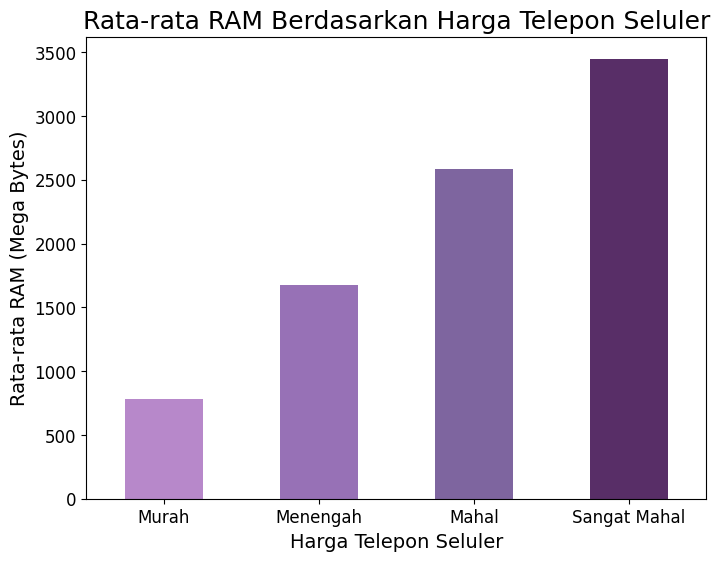

In [ ]:
plt.figure(figsize=(8,6))

data.groupby(['price_range'])['ram'].mean().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata RAM Berdasarkan Harga Telepon Seluler', fontsize=18)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.ylabel('Rata-rata RAM (Mega Bytes)', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

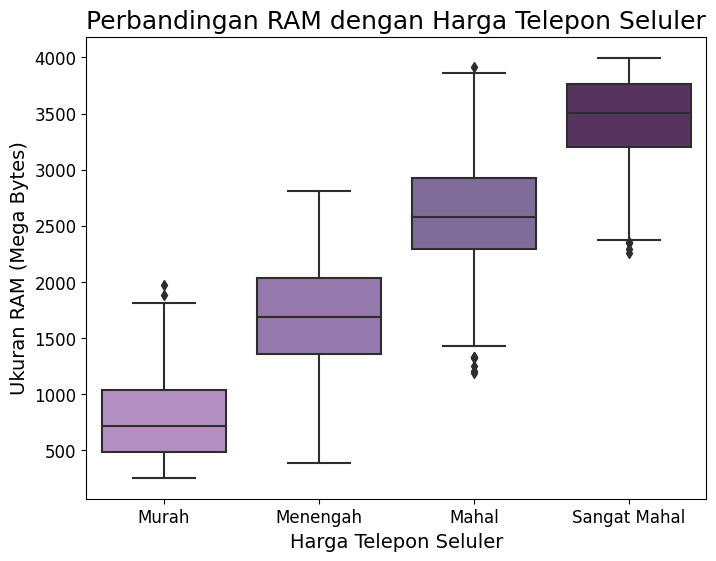

In [ ]:
plt.figure(figsize=(8,6))

snsplot1 = sns.boxplot(x="price_range", y="ram", data=data, palette=cs1)
plt.title('Perbandingan RAM dengan Harga Telepon Seluler', fontsize=18)
plt.ylabel('Ukuran RAM (Mega Bytes)', fontsize=14)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot Battery Power vs Price Range

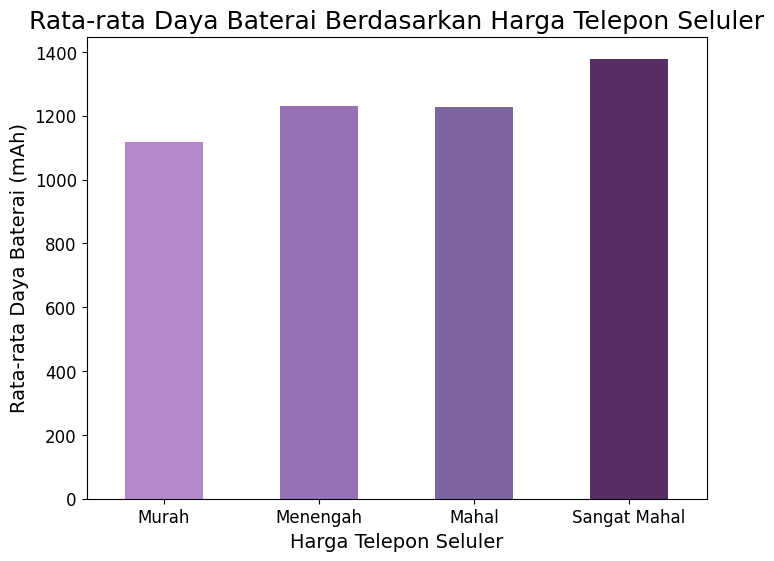

In [ ]:
plt.figure(figsize=(8,6))

data.groupby(['price_range'])['battery_power'].mean().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata Daya Baterai Berdasarkan Harga Telepon Seluler', fontsize=18)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.ylabel('Rata-rata Daya Baterai (mAh)', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

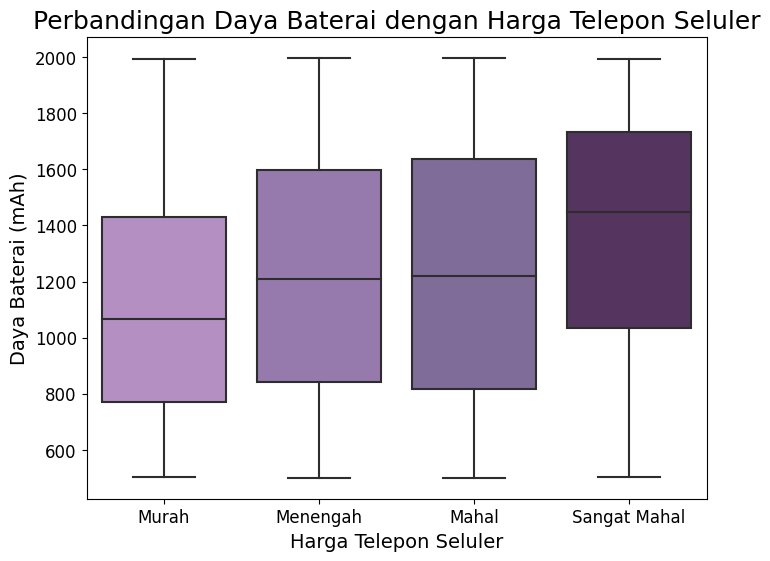

In [ ]:
plt.figure(figsize=(8,6))

snsplot2 = sns.boxplot(x="price_range", y="battery_power", data=data, palette=cs1)
plt.title('Perbandingan Daya Baterai dengan Harga Telepon Seluler', fontsize=18)
plt.ylabel('Daya Baterai (mAh)', fontsize=14)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot Screen Size vs Price Range

<ipython-input-28-919978190813>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['price_range'])['px_width','px_height'].mean().plot(kind = 'bar', color = cs1, rot = 0)


<Figure size 800x600 with 0 Axes>

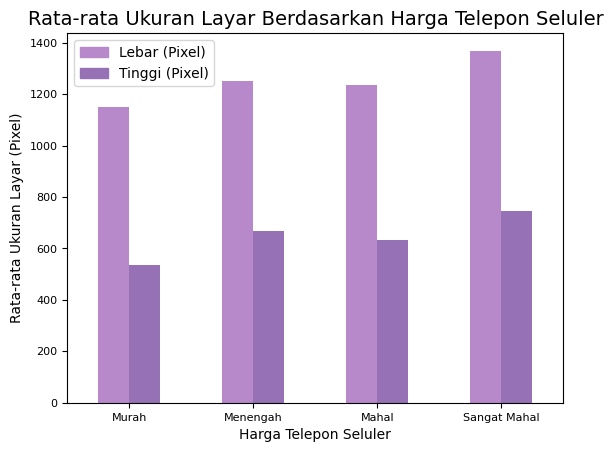

In [ ]:
plt.figure(figsize=(8,6))
lbl1 = mpatches.Patch(color='#b788ca', label='Lebar (Pixel)')
lbl2 = mpatches.Patch(color='#9771b6', label='Tinggi (Pixel)')

data.groupby(['price_range'])['px_width','px_height'].mean().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata Ukuran Layar Berdasarkan Harga Telepon Seluler', fontsize=14)
plt.xlabel('Harga Telepon Seluler', fontsize=10)
plt.ylabel('Rata-rata Ukuran Layar (Pixel)', fontsize=10)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=8)
plt.yticks(fontsize=8)

plt.legend(handles = [lbl1,lbl2], loc = 'upper left')

plt.show()

### Plot Both with 3G and 4G

In [ ]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=data[(data['three_g']==1) & (data['four_g']==1)]

In [ ]:
three_g_and_4g_df['price_range'].value_counts()

3.0    274
1.0    261
0.0    259
2.0    247
Name: price_range, dtype: int64

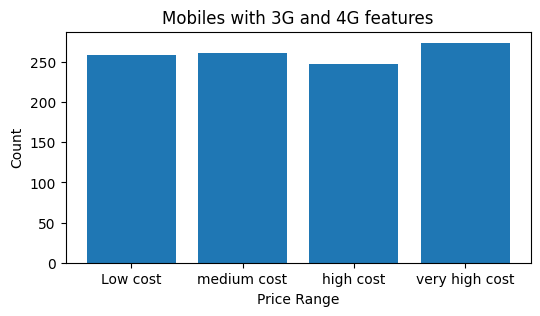

In [ ]:
price_range_counts = three_g_and_4g_df['price_range'].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(price_range_counts.index, price_range_counts.values)
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title('Mobiles with 3G and 4G features')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


### Plot Data 3G

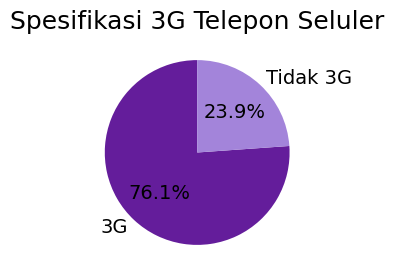

In [ ]:
plt.figure(figsize=(4,3))

labels = ["3G",'Tidak 3G']
values = data['three_g'].value_counts().values
cs2 = ['#641d9b','#a384da']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=cs2, textprops={'fontsize': 14})
plt.title('Spesifikasi 3G Telepon Seluler', fontsize=18)

plt.show()

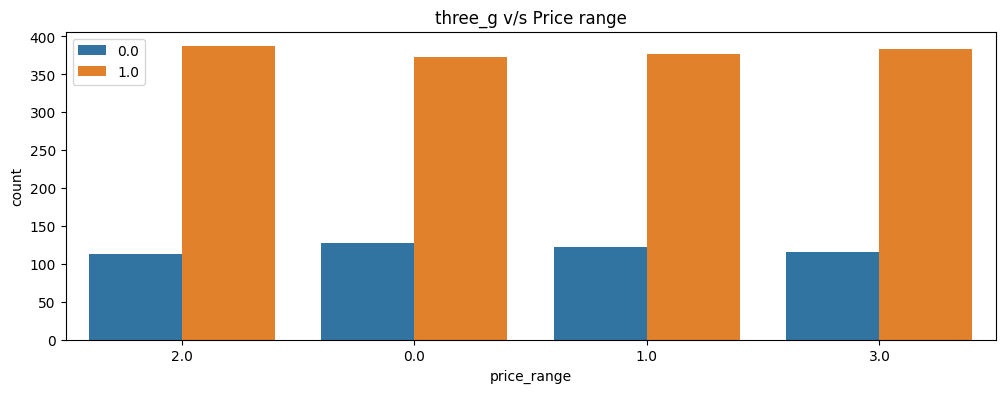

In [ ]:
three_g_categories = list(set(data['three_g']))
price_range_counts = data['price_range'].value_counts()

plt.figure(figsize=(12,4))
sns.countplot(data=data, x='price_range', hue='three_g', order=price_range_counts.index, hue_order=three_g_categories)
plt.title("three_g v/s Price range")
plt.legend(loc='best')

### Plot Data 4G

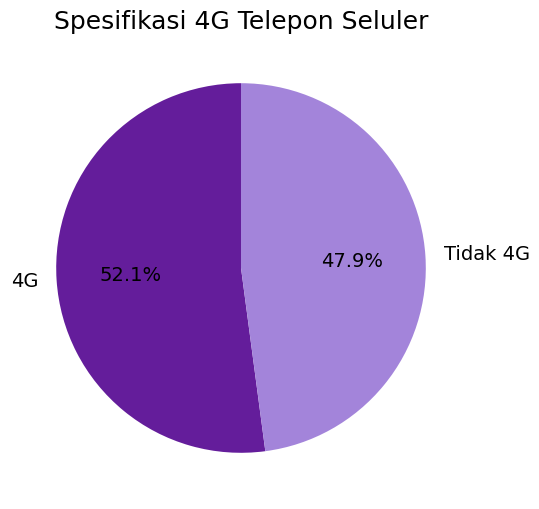

In [ ]:
plt.figure(figsize=(8,6))

labels = ["4G",'Tidak 4G']
values = data['four_g'].value_counts().values
cs2 = ['#641d9b','#a384da']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=cs2, textprops={'fontsize': 14})
plt.title('Spesifikasi 4G Telepon Seluler', fontsize=18)

plt.show()

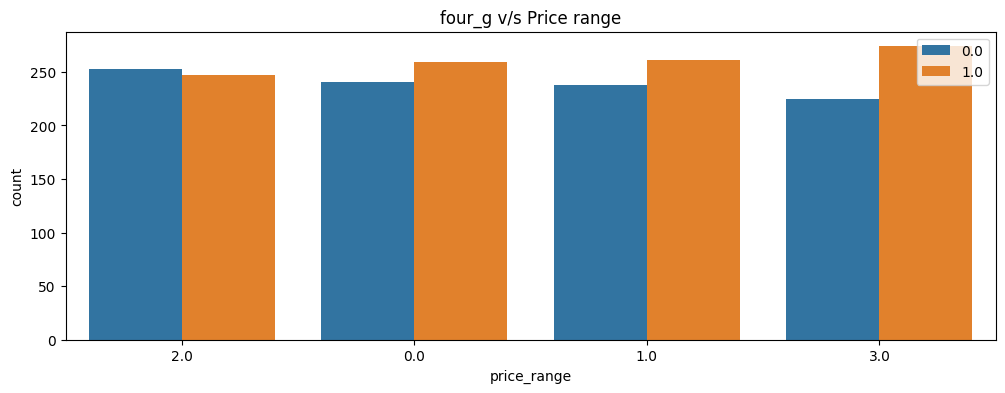

In [ ]:
four_g_categories = list(set(data['four_g']))
price_range_counts = data['price_range'].value_counts()

plt.figure(figsize=(12,4))
sns.countplot(data=data, x='price_range', hue='four_g', order=price_range_counts.index, hue_order=four_g_categories)
plt.title("four_g v/s Price range")
plt.legend(loc='best')


Majority of phones of only price range 2 dont have 4G service.

### No 3G and 4G

In [ ]:
No_3g_4G_df=data[(data['three_g']!=1) & (data['four_g']!=1)]
No_3g_4G_df.shape

(477, 21)

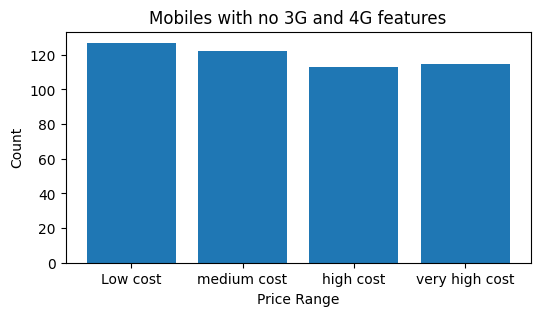

In [ ]:
price_range_counts = No_3g_4G_df['price_range'].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(price_range_counts.index, price_range_counts.values)
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title('Mobiles with no 3G and 4G features')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

Its very obvious that low cost mobiles will not have 3G and 4G.
Mobiles with very high cost may have 5G. As we know technologies are changes everytime

### n_cores v/s price range

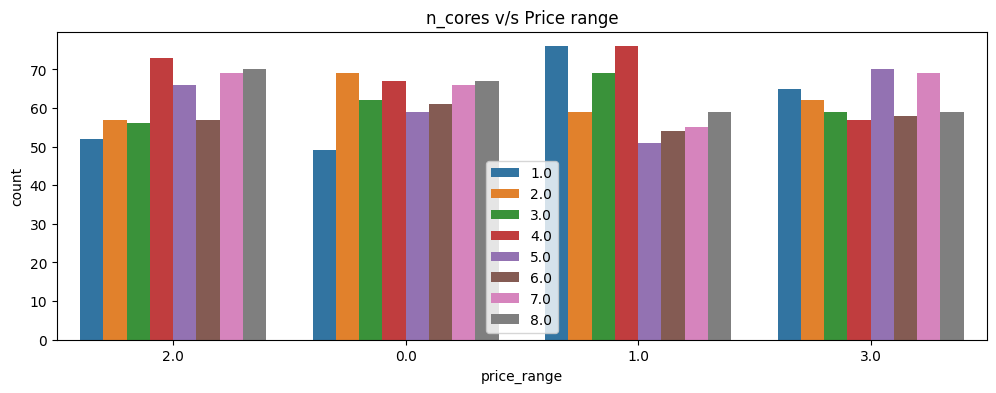

In [ ]:
n_cores_categories = list(set(data['n_cores']))
price_range_counts = data['price_range'].value_counts()

plt.figure(figsize=(12,4))
sns.countplot(data=data, x='price_range', hue='n_cores', order=price_range_counts.index, hue_order=n_cores_categories)
plt.title("n_cores v/s Price range")
plt.legend(loc='best')

* Price range 0 has majority of phones with 2 core processors
* Price range 1 has majority of phones with 1 and 4 core processors
* Price range 2 has majority of phones with 4 core processors
* Price range 3 has majority of phones with 5 and 7 core processors

### With bluetooth features

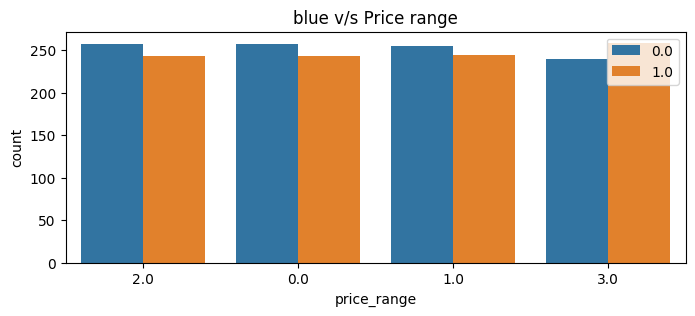

In [ ]:
blue_categories = list(set(data['blue']))
price_range_counts = data['price_range'].value_counts()

plt.figure(figsize=(8,3))
sns.countplot(data=data, x='price_range', hue='blue', order=price_range_counts.index, hue_order=blue_categories)
plt.title("blue v/s Price range")
plt.legend(loc='best')

Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.

### Plot Battery Power vs Touch Screen

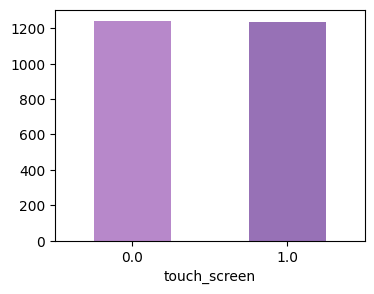

In [ ]:
plt.figure(figsize=(4,3))
data.groupby(['touch_screen'])['battery_power'].mean().plot(kind = 'bar', color = cs1, rot = 0)
plt.show()

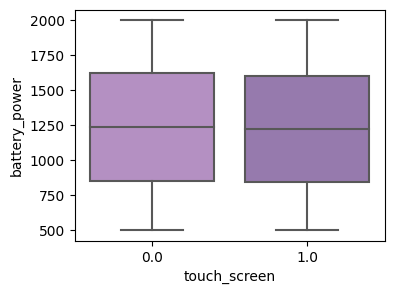

In [ ]:
plt.figure(figsize=(4,3))
snsplot2 = sns.boxplot(x="touch_screen", y="battery_power", data=data, palette=cs1)
plt.show()

### Price Range with supported and unsupported feature

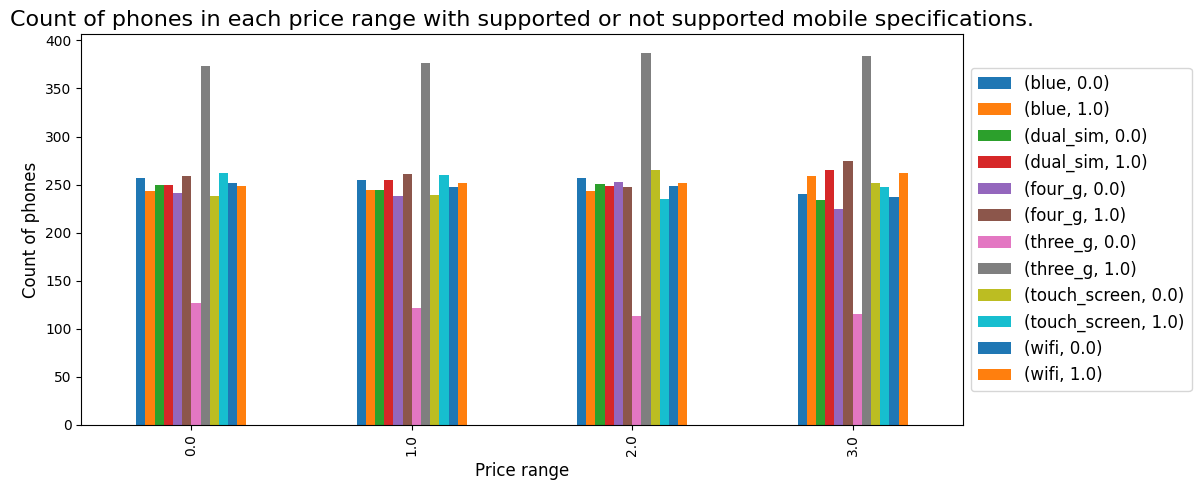

In [ ]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=data.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

fig, ax = plt.subplots(figsize=(12, 5))
grup_by_price.plot.bar(ax=ax)
plt.title('Count of phones in each price range with supported or not supported mobile specifications.', fontsize=16)
plt.xlabel('Price range', fontsize=12)
plt.ylabel('Count of phones', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()  # Mengoptimalkan tata letak grafik

# Menyesuaikan ukuran font pada sumbu x dan y
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()


Pada masing-masing kategori harga seimbang ada yang punya fitur dan ada yang tidak punya

<Figure size 1200x300 with 0 Axes>

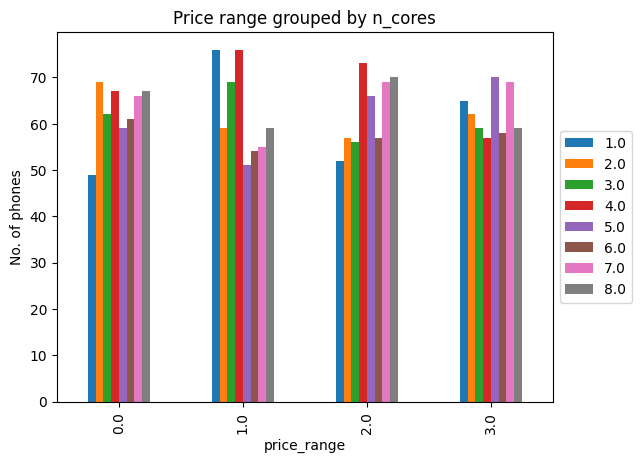

<Figure size 1200x300 with 0 Axes>

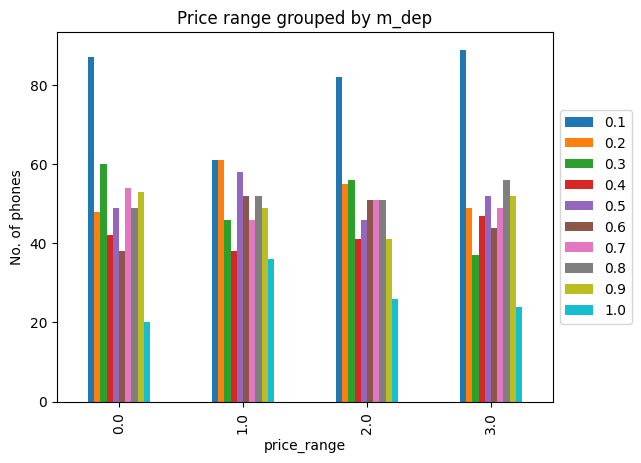

In [ ]:
list_2 = ['n_cores', 'm_dep']

for item in list_2:
    plt.figure(figsize=(12, 3))
    ax = data.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
    plt.title(f'Price range grouped by {item}')
    plt.ylabel('No. of phones')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Memindahkan penjelasan warna ke samping kiri

plt.show()

* There are very few mobiles in price range 0 and 1 with lesser no of cores.
* Most of the mobiles in price range 2 and 3 are with high no of cores.

* Number of phones with less thickness is high and count of phones with high thickness is low.

### Check numerical fitur that significan affect a price range.##

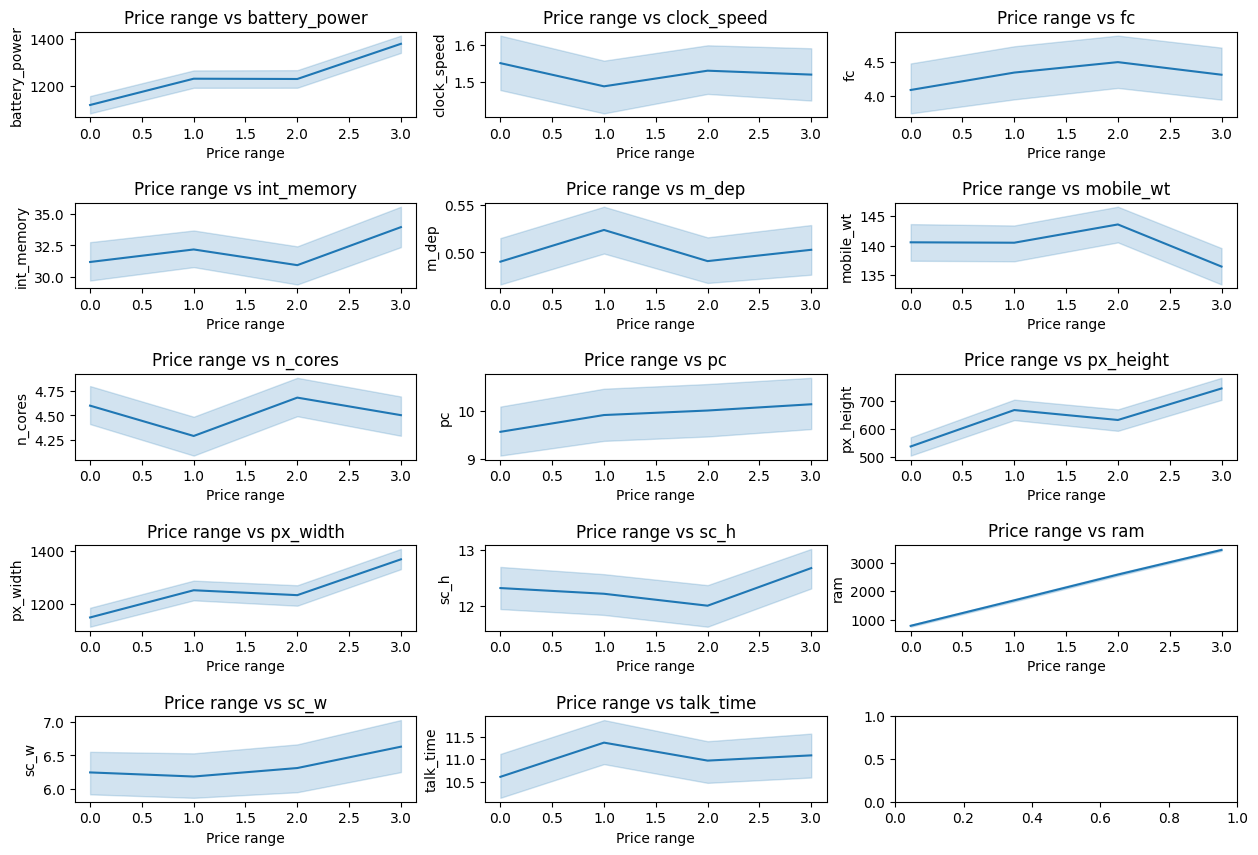

In [ ]:
list_1 = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
          'px_height', 'px_width', 'sc_h', 'ram', 'sc_w', 'talk_time']


# plotting boXplot and distribution
num_plots = len(list_1)
num_cols = 3

num_rows = num_plots // num_cols
if num_plots % num_cols != 0:
    num_rows += 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

counter = 0
for var in list_1:
    row = counter // num_cols
    col = counter % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]

    sns.lineplot(x=data['price_range'], y=data[var], ax=ax)
    ax.set_title(f'Price range vs {var}', fontsize=12)
    ax.set_xlabel('Price range', fontsize=10)
    ax.set_ylabel(var, fontsize=10)

    counter += 1

plt.subplots_adjust(hspace=1)

plt.show()

* For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.
* Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.
* Mobiles having max screen  height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases
RAM has clear relationship with price range we saw that in correlation matrix also.

In [ ]:
# Cek jumlah data missing tiap kolom
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Cek jumlah data terduplikasi pada dataset
data.duplicated().sum()

0

In [ ]:
# Drop (menghilangkan) data missing dan duplikat dari dataset
# data = data.dropna().reset_index(drop=True)
# data = data.drop_duplicates()
# data

## Distribution of columns and Outliers.

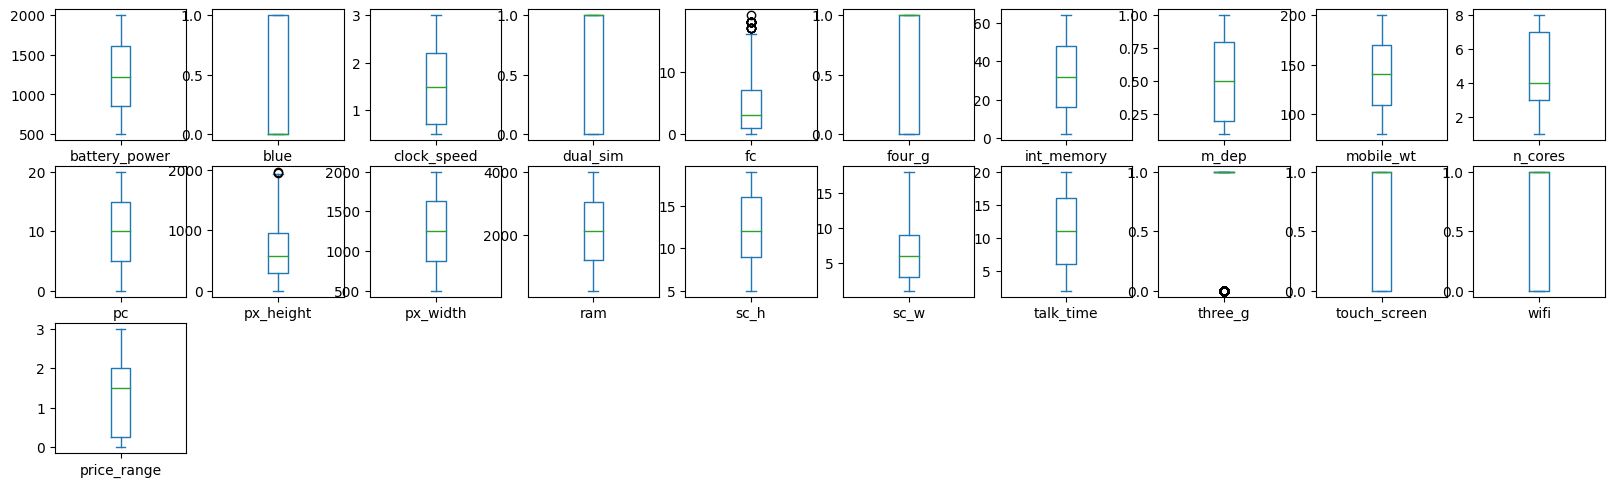

In [ ]:
# Cek outlier dari dataset
data.plot(kind="box",subplots=True,layout=(10,10),sharex=False,sharey=False,figsize=(20,20))
plt.show()

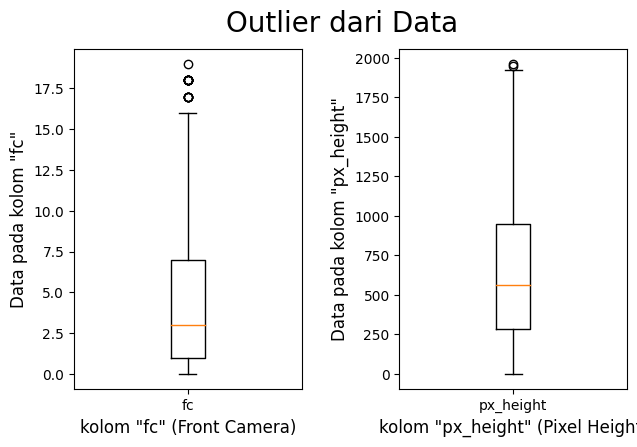

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(4)
fig.tight_layout()
#fig.suptitle('Horizontally stacked subplots')

ax1.boxplot(data['fc'])
ax1.set_xlabel('kolom "fc" (Front Camera)', fontsize=12)
ax1.set_ylabel('Data pada kolom "fc"', fontsize=12)
ax1.set_xticklabels(['fc'])

ax2.boxplot(data['px_height'])
ax2.set_xlabel('kolom "px_height" (Pixel Height)', fontsize=12)
ax2.set_ylabel('Data pada kolom "px_height"', fontsize=12)
ax2.set_xticklabels(['px_height'])

plt.subplots_adjust(right=1.5)

plt.title('Outlier dari Data', x=-0.25, y=1.025, fontsize=20)
plt.show()

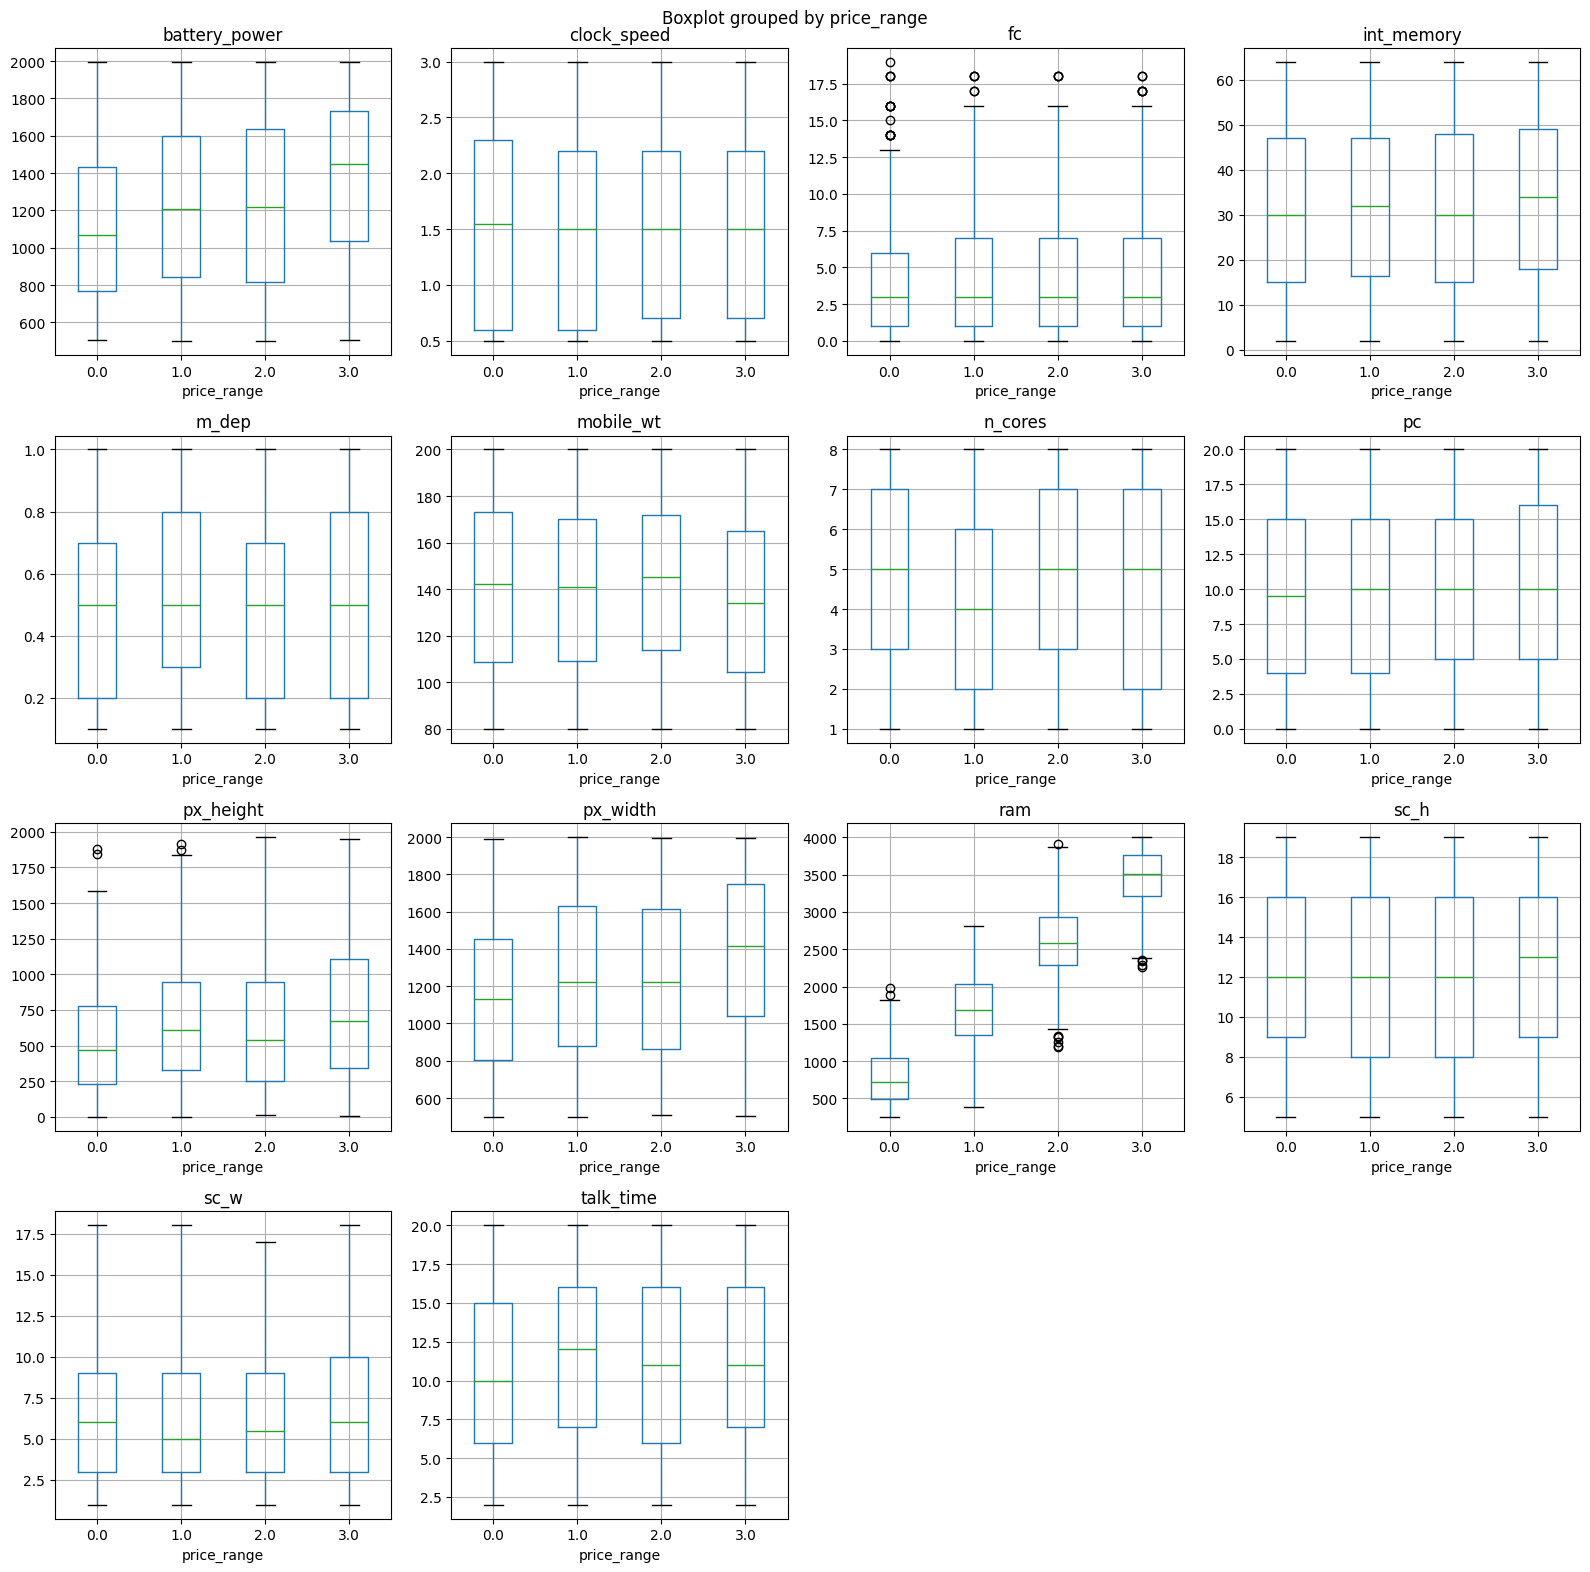

In [ ]:
def showing_boxplot(data, features):
    num_plots = len(features)
    num_cols = 4  # Jumlah kolom yang ingin ditampilkan secara horizontal

    # Hitung jumlah baris yang diperlukan berdasarkan jumlah grafik dan kolom yang ingin ditampilkan
    num_rows = (num_plots + num_cols - 1) // num_cols

    # Buat subplot dengan jumlah baris dan kolom yang sesuai
    fig, axes = plt.subplots(num_rows, num_cols, squeeze=False, figsize=(16, 4*num_rows))

    for i, c in enumerate(features):
        # Hitung indeks baris dan kolom
        row = i // num_cols
        col = i % num_cols

        # 1st quartile
        Q1 = np.percentile(data[c], 25)
        # 3rd quartile
        Q3 = np.percentile(data[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index

        # Group data by "price_range" and plot boxplot
        data.boxplot(column=c, by="price_range", ax=axes[row, col])
        axes[row, col].set_title(c)  # Menambahkan judul grafik

    # Menghilangkan subplot yang tidak digunakan
    for i in range(num_plots, num_rows*num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

showing_boxplot(data, ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt",
                      "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time"])

* Data is well distrubted.
* fc and px_height has some outliers

## Handle Outliers

In [ ]:
Q1 = data["fc"].quantile(0.25)
Q3 = data['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
data = data[(data['fc'] <= Q3)]

In [ ]:
Q1 = data["px_height"].quantile(0.25)
Q3 = data['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
data = data[(data['px_height'] <= Q3)]

<ipython-input-53-ed5177d52396>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(data[var],color='#7e659f')


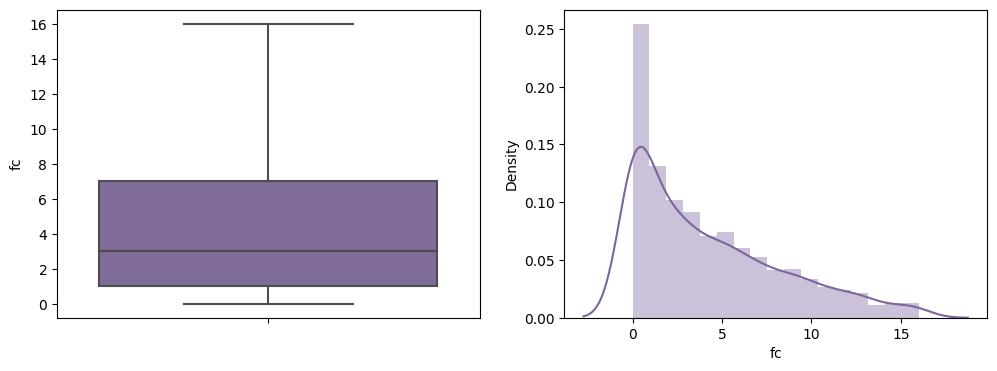

<ipython-input-53-ed5177d52396>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(data[var],color='#7e659f')


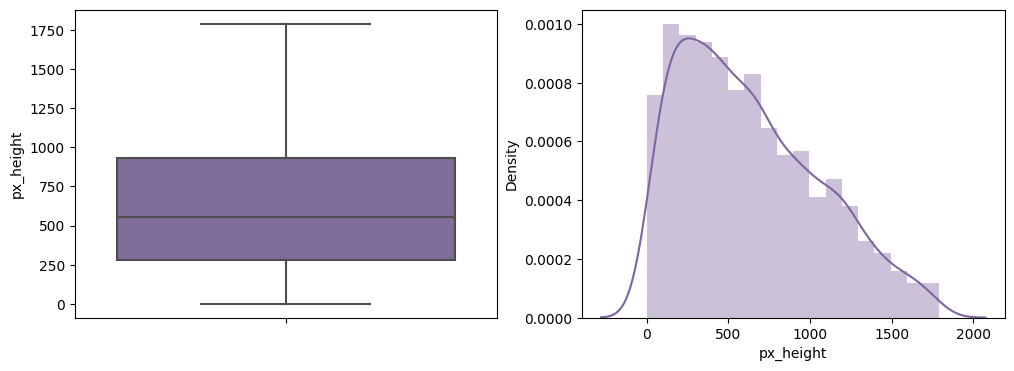

In [ ]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var],color='#7e659f')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var],color='#7e659f')

    fig.set_xlabel(var)

    plt.show()

Now in box plot no oultiers are present.

In [ ]:
# create copy of data
data_df=data.copy()


## Feature Selection

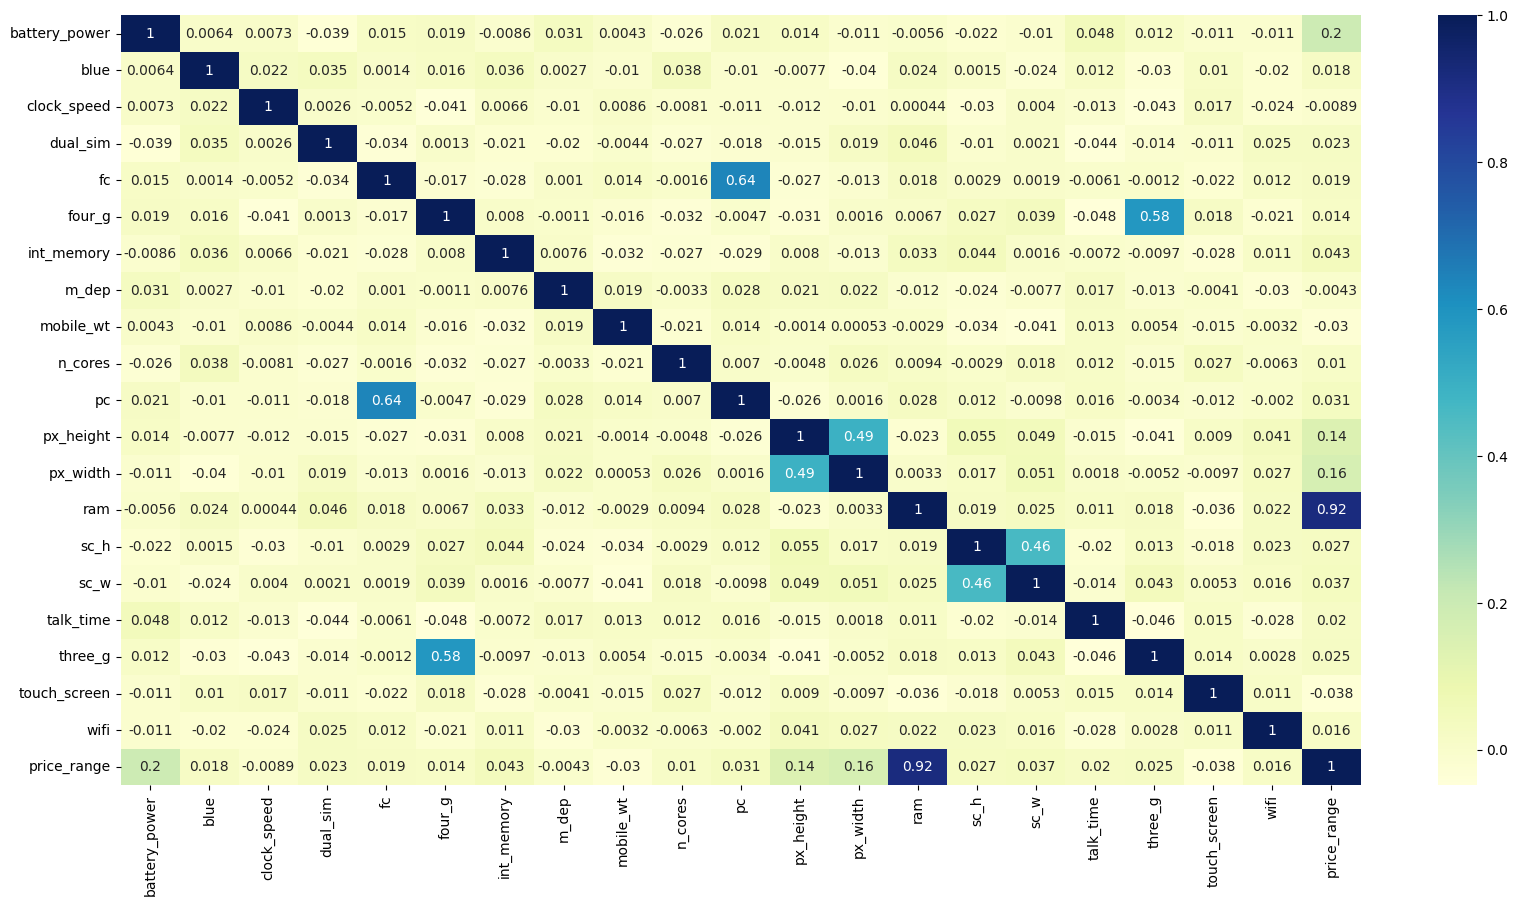

In [ ]:
corr = data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

plt.show()

In [ ]:

# Separating X variables(indpendent variables) and Y(dependent variable) variable.
x=data.drop('price_range',axis=1)
y=data["price_range"]


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#No we Will select the  top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x,y)

In [ ]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
# Check dataframe
featureScores

,Specs,Score
0,battery_power,13276.863289
1,blue,0.625168
2,clock_speed,0.830213
3,dual_sim,0.736762
4,fc,10.867193
5,four_g,1.319605
6,int_memory,78.357703
7,m_dep,0.797351
8,mobile_wt,87.027556
9,n_cores,8.395937


In [ ]:
# 12 features with highest chi squared statistic
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  914971.362532
11      px_height   15629.508974
0   battery_power   13276.863289
12       px_width    9172.791036
8       mobile_wt      87.027556
6      int_memory      78.357703
14           sc_h      11.815783
16      talk_time      11.460771
15           sc_w      11.079469
4              fc      10.867193
9         n_cores       8.395937
10             pc       7.639203


In [ ]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=data[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# dependent varaible
y=data['price_range']

# Modelling

Algorithms used for predictive modeling:
* 1) Decision Tree
* 2) Random Forest classifier
* 3) Gradient Boosting Classifier
* 4) K-nearest Neighbour classifier
* 5) XG Boost Classifier
* 6) Support Vector Machine(SVM)


As Decision tree,random forest and enssembles trees do not require Feature scaling as these are Tree based models. So we will be using X_train and X_test which are not scaled.


For K nearest Neighbors and SVM we will be usingseX_train_scaled and X_test_scaled. That is we we will use Standardised data. i.e. Scaled data. As these are distance based Algorithms.

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 42.2 MB/s eta 0:00:00


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
# splitting the data into Train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1471, 20)
(491, 20)
(1471,)


In [ ]:
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

In [ ]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

  # plotting
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

## **1)Decision Tree Classifier:**

**Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.**
**So here we will use X_train,X_test,y_test and Y_train which are not scaled.**

Decision Tree with default hyperparameters:


In [ ]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)

In [ ]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [ ]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8472505091649695

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[125,  13,   0,   0],
       [ 11,  87,  17,   0],
       [  0,  12, 101,   6],
       [  0,   0,  16, 103]])

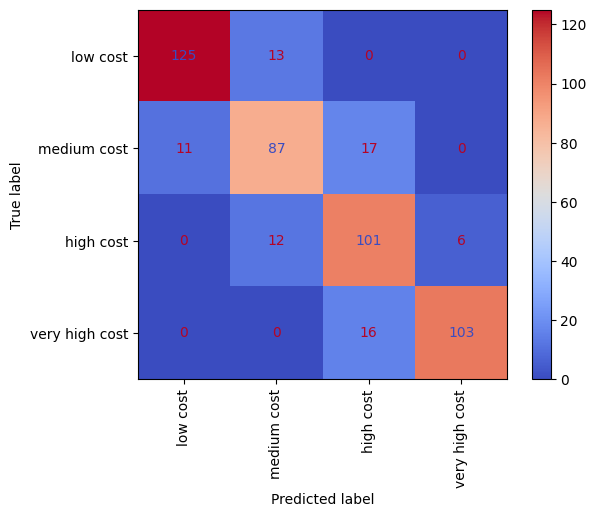

In [ ]:
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')

In [ ]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       138
         1.0       0.78      0.76      0.77       115
         2.0       0.75      0.85      0.80       119
         3.0       0.94      0.87      0.90       119

    accuracy                           0.85       491
   macro avg       0.85      0.84      0.85       491
weighted avg       0.85      0.85      0.85       491



* Train set accuracy is 100% and test accuracy is 85%.
* Model is overfitted on train set and did not generalised well.
* We will tune hyperparamters to reduce overfitting and try to imporve the model performance.

### Tuning Hyperparameters of Decsion Tree classifier

In [ ]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [ ]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.441 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.449 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.463 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.432 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.425 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.464 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.442 total time=   0.0s
[CV 3/5] END criterion=gini, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=10, splitter=random;, score=0.464 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=10, splitter=random;, score=0.442 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=10, splitter=random;, score=0.415 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=10, splitter=random;, score=0.459 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=10, splitter=random;, score=0.418 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.441 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.449 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.463 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.432 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.425 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.464 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.442 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.415 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.459 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, splitter=random;, score=0.422 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, splitter=random;, score=0.449 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, splitter=random;, score=0.418 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=5, splitter=best;, score=0.546 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=5, splitter=best;, score=0.520 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=5, splitter=best;, score=0.531 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=5, splitter=best;, score=0.517 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=5, splitter=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.517 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.531 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.441 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.432 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.422 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.449 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.418 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=5, split

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=10, splitter=best;, score=0.554 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=10, splitter=best;, score=0.558 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=10, splitter=best;, score=0.534 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=10, splitter=best;, score=0.493 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.488 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.480 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.439 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=10, s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.469 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.480 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.554 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.558 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.534 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.493 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=10, split

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.524 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.605 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.508 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.486 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.466 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.497 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.456 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.636 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.514 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.524 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.605 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.508 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.486 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.466 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=10, s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=random;, score=0.493 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=random;, score=0.514 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=random;, score=0.558 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, splitter=best;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, splitter=best;, score=0.609 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, splitter=best;, score=0.561 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, splitter=best;, score=0.565 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, splitter=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.565 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.639 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.444 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.670 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.493 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.514 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.558 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=5, split

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=3, splitter=random;, score=0.520 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=3, splitter=random;, score=0.524 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=3, splitter=random;, score=0.588 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=best;, score=0.661 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=best;, score=0.711 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=best;, score=0.636 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=best;, score=0.701 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.629 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.612 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.707 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.590 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.585 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.520 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.524 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, splitte

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=best;, score=0.595 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=best;, score=0.745 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=best;, score=0.704 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=best;, score=0.639 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=random;, score=0.593 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=random;, score=0.575 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=random;, score=0.507 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_spl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.673 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.585 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.607 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.612 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.609 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, spl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=3, splitter=random;, score=0.575 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=3, splitter=random;, score=0.541 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=3, splitter=random;, score=0.558 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.620 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.701 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.609 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.704 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.502 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.541 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.629 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.690 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.582 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.631 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.707 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.627 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.690 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.619 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.731 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=random;, score=0.522 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, spl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.680 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=random;, score=0.536 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=random;, score=0.629 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=random;, score=0.653 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=random;, score=0.626 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=random;, score=0.626 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.692 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.661 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.633 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.660 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.595 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=random;, score=0.546 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, spl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.544 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.568 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.607 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.609 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.551 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=best;, score=0.644 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=best;, score=0.636 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=best;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=best;, score=0.650 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=best;, score=0.690 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.631 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, spl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=best;, score=0.673 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=random;, score=0.610 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=random;, score=0.609 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=random;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=random;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=random;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=3, splitter=random;, score=0.554 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=3, splitter=random;, score=0.493 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=3, splitter=random;, score=0.609 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.728 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.660 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.660 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=5, s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.610 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.694 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.707 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.650 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.704 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.651 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, spl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=best;, score=0.441 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=best;, score=0.459 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=best;, score=0.463 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=best;, score=0.432 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=best;, score=0.422 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=random;, score=0.464 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=random;, score=0.449 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, m

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.439 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.418 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.441 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.459 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.463 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.432 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.422 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, splitter=best;, score=0.524 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, splitter=best;, score=0.568 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, splitter=random;, score=0.434 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, splitter=random;, score=0.452 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, splitter=random;, score=0.418 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, splitter=random;, score=0.446 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, splitter=random;, score=0.415 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, mi

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.468 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.551 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.548 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.524 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.568 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.434 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.452 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samp

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.478 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.480 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.514 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.510 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.452 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.631 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sq

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.631 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.646 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.602 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.582 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.478 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.480 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, m

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=best;, score=0.558 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=best;, score=0.466 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=best;, score=0.609 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.464 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.575 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.541 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.571 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.503 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.442 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.539 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.476 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.558 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.466 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.609 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_sa

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.651 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.503 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.741 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.622 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.599 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=random;, score=0.654 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=random;, score=0.605 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samp

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=10, splitter=best;, score=0.680 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=10, splitter=random;, score=0.542 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=10, splitter=random;, score=0.514 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=10, splitter=random;, score=0.602 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=10, splitter=random;, score=0.456 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=10, splitter=random;, score=0.493 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.651 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sq

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, splitter=random;, score=0.554 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, splitter=random;, score=0.452 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, splitter=random;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=best;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=best;, score=0.677 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=best;, score=0.575 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=best;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, mi

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.532 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.721 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.660 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.544 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.603 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.561 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samp

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=best;, score=0.602 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=best;, score=0.755 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=best;, score=0.588 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=best;, score=0.626 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=random;, score=0.651 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=random;, score=0.520 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=random;, score=0.483 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, splitter=random;, score=0.520 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, splitter=random;, score=0.619 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.670 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.728 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.701 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.639 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.650 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.575 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.561 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.721 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.685 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.595 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.534 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.452 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=random;, score=0.677 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.732 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.629 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.585 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_feature

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.650 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.575 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.561 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.721 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.685 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.595 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.718 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.677 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=random;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=random;, score=0.633 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=random;, score=0.694 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=au

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.728 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.532 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.446 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.507 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=best;, score=0.677 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=best;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=best;, score=0.694 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=best;, score=0.704 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.620 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.565 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.561 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_featur

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.702 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.548 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.527 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.714 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.626 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.515 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.558 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.476 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.551 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.704 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=5, splitter=best;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=5, splitter=best;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, splitter=random;, score=0.561 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, splitter=random;, score=0.554 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, splitter=random;, score=0.636 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.688 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.701 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.732 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.728 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=random;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=random;, score=0.558 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=auto, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.639 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.549 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.571 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.558 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.541 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sq

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
# best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       random_state=0)

In [ ]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [ ]:
# Checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.9782460910944936

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8391038696537678

In [ ]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[129,   9,   0,   0],
       [ 12,  91,  12,   0],
       [  0,  19,  89,  11],
       [  0,   0,  16, 103]])

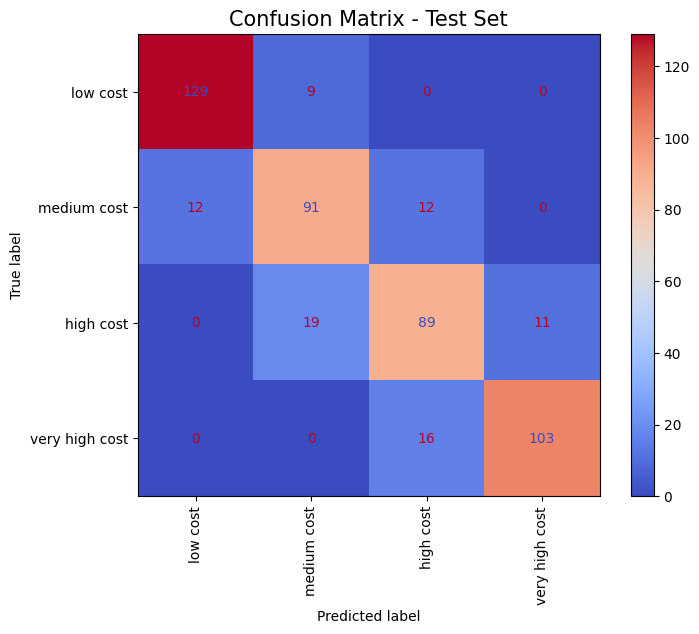

In [ ]:
y_pred = dtc_optimal.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(ax=ax, cmap='coolwarm', xticks_rotation='vertical')
ax.grid(False)
ax.set_title('Confusion Matrix - Test Set', fontsize=15)
plt.show()

In [ ]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       356
         1.0       0.96      0.98      0.97       376
         2.0       0.98      0.97      0.98       372
         3.0       0.99      0.99      0.99       367

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [ ]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       138
         1.0       0.76      0.79      0.78       115
         2.0       0.76      0.75      0.75       119
         3.0       0.90      0.87      0.88       119

    accuracy                           0.84       491
   macro avg       0.84      0.83      0.84       491
weighted avg       0.84      0.84      0.84       491



In [ ]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and
  plots the feature importance graph'''

  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

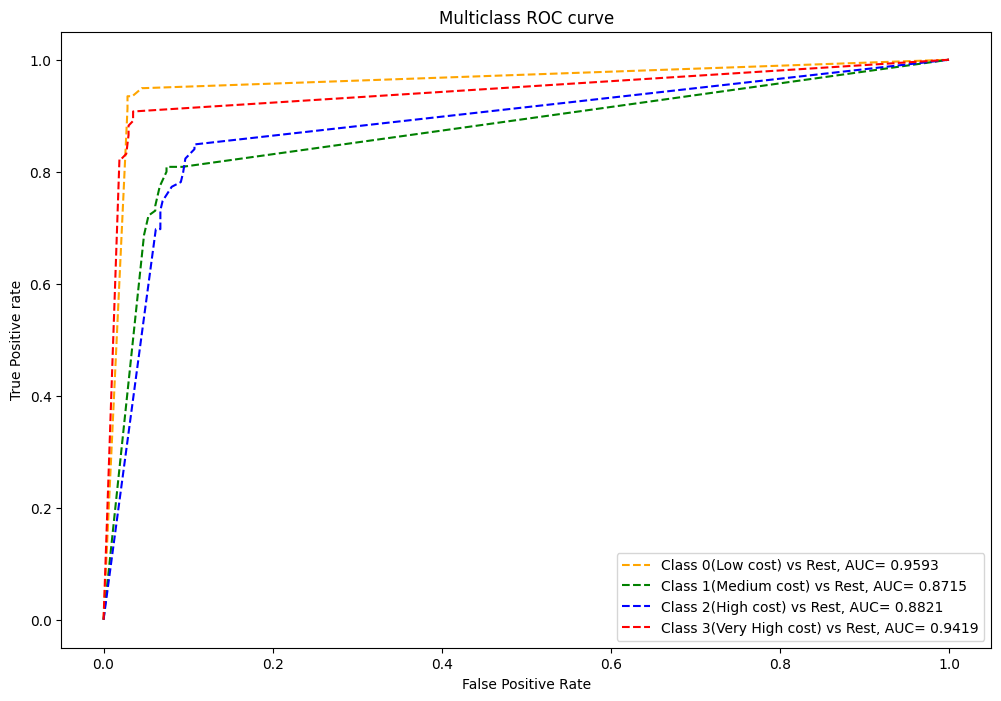

In [ ]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

 **Decision Tree Classifier-Observations:**
* ***Train accuarcy has been reduced to 98% from 100% and so test accuarcy is decreased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model.***

* ***RAM,battery power,px_height and width came out to be the most important featrures***
* ***This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.***

## 2) Random Forest classifier:

With default hyperparamters:

In [ ]:
# splitting the data into trainset and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [ ]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8859470468431772

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[129,   9,   0,   0],
       [ 10,  95,  10,   0],
       [  0,  13, 102,   4],
       [  0,   0,  10, 109]])

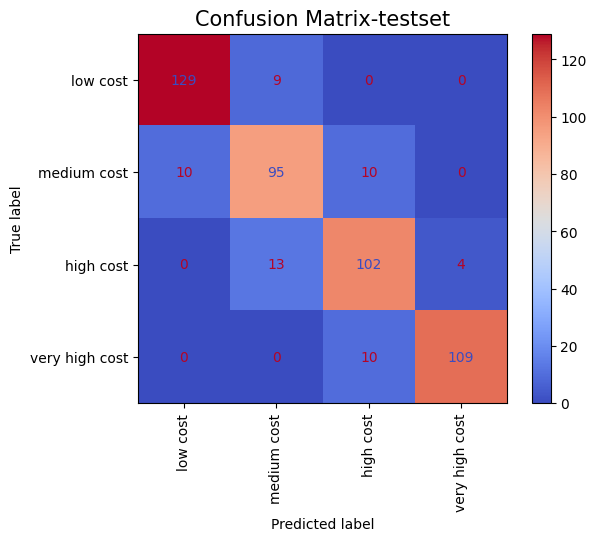

In [ ]:
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')
plt.title('Confusion Matrix-testset', fontsize=15)
plt.show()

In [ ]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       138
         1.0       0.81      0.83      0.82       115
         2.0       0.84      0.86      0.85       119
         3.0       0.96      0.92      0.94       119

    accuracy                           0.89       491
   macro avg       0.89      0.88      0.88       491
weighted avg       0.89      0.89      0.89       491



* Train accuarcy is 100% and test accuracy is 89%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.
* we do some hyperparameter tunning to reduce overfitting

### Hyperparamter Tunning of the Random forest model

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']

             }

In [ ]:
# creating the instance
rfc_= RandomForestClassifier(random_state=0)

In [ ]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.876 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.890 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.920 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.874 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.882 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.920 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.880 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.890 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.924 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.882 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.894 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.922 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.884 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.882 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.914 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.884 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.892 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.916 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.882 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.890 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.920 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.882 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.894 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.924 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.876 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.880 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.920 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.876 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.886 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.918 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.876 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.884 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.927 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.878 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.884 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.924 total time=   2.8s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.876 total time=   1.2s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.890 total time=   1.2s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.920 total time=   1.2s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.874 total time=   1.5s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.882 total time=   1.5s
[CV 3/3] END criterion=entropy, max_depth=Non

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.868 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.871 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.918 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.868 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.884 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.918 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.870 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.876 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.920 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.876 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.884 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.920 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.876 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.876 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.914 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.880 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.886 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.916 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.876 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.882 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.929 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.876 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.886 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.922 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.870 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.871 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.914 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.862 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.876 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.906 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.874 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.876 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.912 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.870 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.884 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.916 total time=   2.6s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.868 total time=   1.1s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.871 total time=   1.1s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.918 total time=   1.1s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.868 total time=   1.6s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.884 total time=   1.5s
[CV 3/3] END criterion=entropy, max_depth=10, max_feature

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.878 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.892 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.920 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.874 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.884 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.920 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.880 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.890 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.924 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.882 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.896 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.922 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.884 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.882 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.914 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.884 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.892 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.916 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.882 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.890 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.920 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.882 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.894 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.924 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.876 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.880 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.920 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.876 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.886 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.918 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.876 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.884 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.927 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.878 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.884 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.924 total time=   2.6s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.878 total time=   1.2s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.892 total time=   1.1s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.920 total time=   1.1s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.874 total time=   2.2s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.884 total time=   2.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_feature

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.876 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.890 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.920 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.874 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.882 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.920 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.880 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.890 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.924 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.882 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.894 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.922 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.884 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.882 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.914 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.884 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.892 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.916 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.882 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.890 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.920 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.882 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.894 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.924 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.876 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.880 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.920 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.876 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.886 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.918 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.876 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.884 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.927 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.878 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.884 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=entropy, max_depth=40, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.924 total time=   2.6s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.876 total time=   1.1s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.890 total time=   1.1s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.920 total time=   1.1s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.874 total time=   1.5s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.882 total time=   1.8s
[CV 3/3] END criterion=entropy, max_depth=40, max_feature

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.868 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.884 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.910 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.870 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.890 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.914 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.866 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.896 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.914 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.870 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.888 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.910 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.868 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.886 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.914 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.864 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.886 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.914 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.866 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.882 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.916 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.859 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.884 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.920 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.866 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.867 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.908 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.857 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.873 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.908 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.859 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.873 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.906 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.866 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.878 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.910 total time=   2.3s
[CV 1/3] END criterion=gini, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.868 total time=   1.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.884 total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.910 total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.870 total time=   1.3s
[CV 2/3] END criterion=gini, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.890 total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=None, max_features=log2,

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.872 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.878 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.918 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.870 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.886 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.912 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.864 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.886 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.912 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.870 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.892 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=700;, score=0.914 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.864 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.876 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.912 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.857 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.882 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.912 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.864 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.886 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=500;, score=0.912 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.859 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.884 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=700;, score=0.920 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.868 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.878 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=300;, score=0.916 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.870 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.884 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=400;, score=0.908 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.868 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.882 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=500;, score=0.910 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.866 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.880 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=10, n_estimators=700;, score=0.910 total time=   2.4s
[CV 1/3] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.872 total time=   1.4s
[CV 2/3] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.878 total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.918 total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.870 total time=   1.3s
[CV 2/3] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.886 total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=10, max_features=log2, max_leaf_node

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.870 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.888 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.910 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.874 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.888 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END criterion=gini, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.916 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END criterion=gini, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.864 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END criterion=gini, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.894 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
#Getting best paramters for the models
rfc_tune.best_params_

In [ ]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

In [ ]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [ ]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

In [ ]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

In [ ]:
# getting confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
y_pred = rfc_optimal.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')
plt.title('Confusion Matrix-testset', fontsize=15)
plt.show()


In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

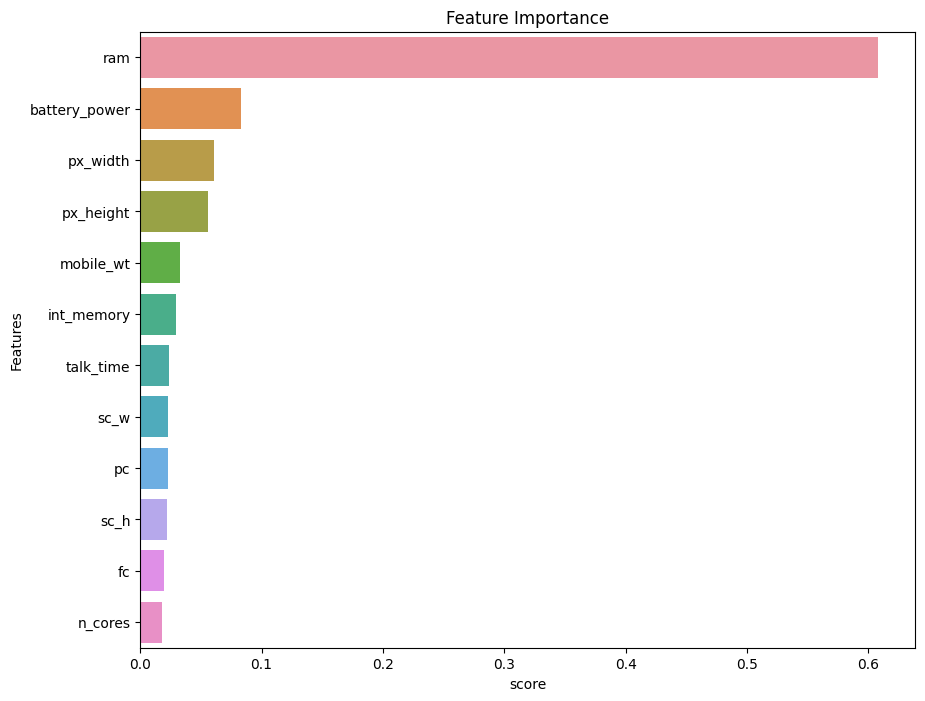

In [ ]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

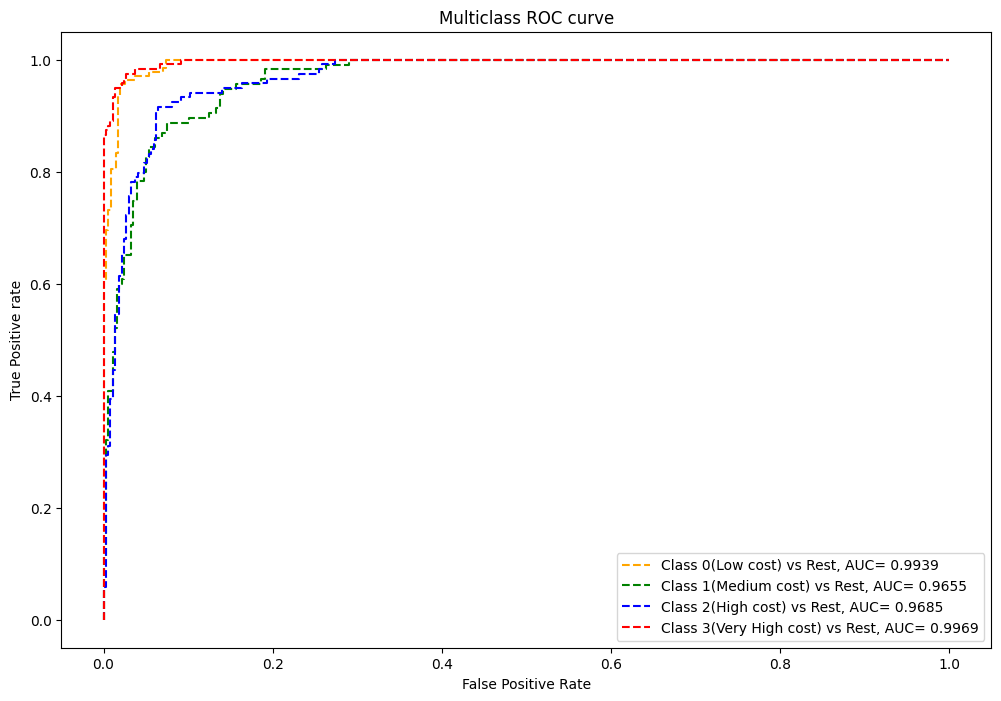

In [ ]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

###**Observations of Random Forest:**
***Before Tuning***
* ***training accuarcy = 100%***
* ***test accuarcy = 88%***

***Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.***

***After tuning:***
* ***Training accuarcy= 100%***
* ***Test accuarcy = 90%***

***we have slightly improved the model and overfitting is reduced slightly.***

***From roc curve its clear that model has poorly performed to classify class 1 and class 2.***

## **3)Gradient Boosting Classifier:**

 **With default hyperparameters:**

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# fittng/training the data.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [ ]:
# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.90020366598778

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[132,   6,   0,   0],
       [  9,  99,   7,   0],
       [  0,  12, 102,   5],
       [  0,   0,  10, 109]])

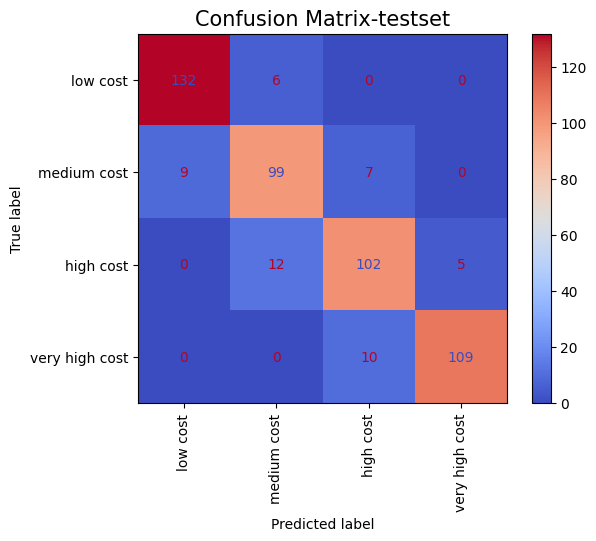

In [ ]:
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')
plt.title('Confusion Matrix-testset', fontsize=15)
plt.show()


In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       138
         1.0       0.85      0.86      0.85       115
         2.0       0.86      0.86      0.86       119
         3.0       0.96      0.92      0.94       119

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.90      0.90       491



### Hyperparameter tuning

In [ ]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)

             }

In [ ]:
# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [ ]:
# Getting best parameters
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 22}

In [ ]:
# getting best estimators
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=22,
                           random_state=0)

In [ ]:
# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=25)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=25,
                           random_state=0)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)
y_pred=gbc_optimal.predict(X_test)

In [ ]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# test set accuracy score
accuracy_score(y_test,y_pred)

0.9042769857433809

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[131,   7,   0,   0],
       [  7, 102,   6,   0],
       [  0,  11, 102,   6],
       [  0,   0,  10, 109]])

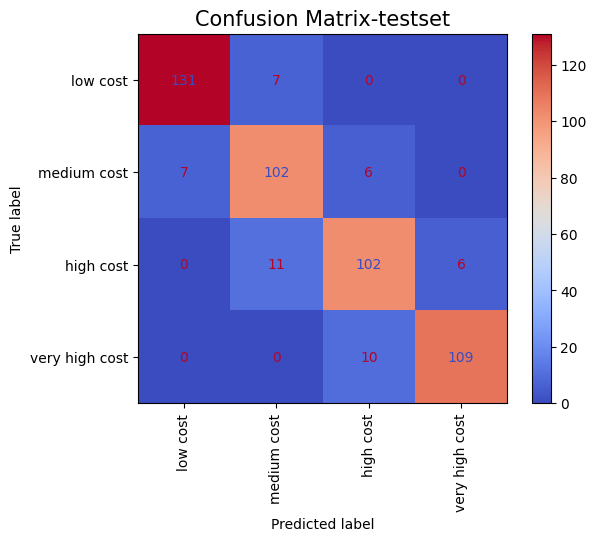

In [ ]:
y_pred = gbc_optimal.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')
plt.title('Confusion Matrix-testset', fontsize=15)
plt.show()


In [ ]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       138
         1.0       0.85      0.89      0.87       115
         2.0       0.86      0.86      0.86       119
         3.0       0.95      0.92      0.93       119

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.91      0.90      0.90       491



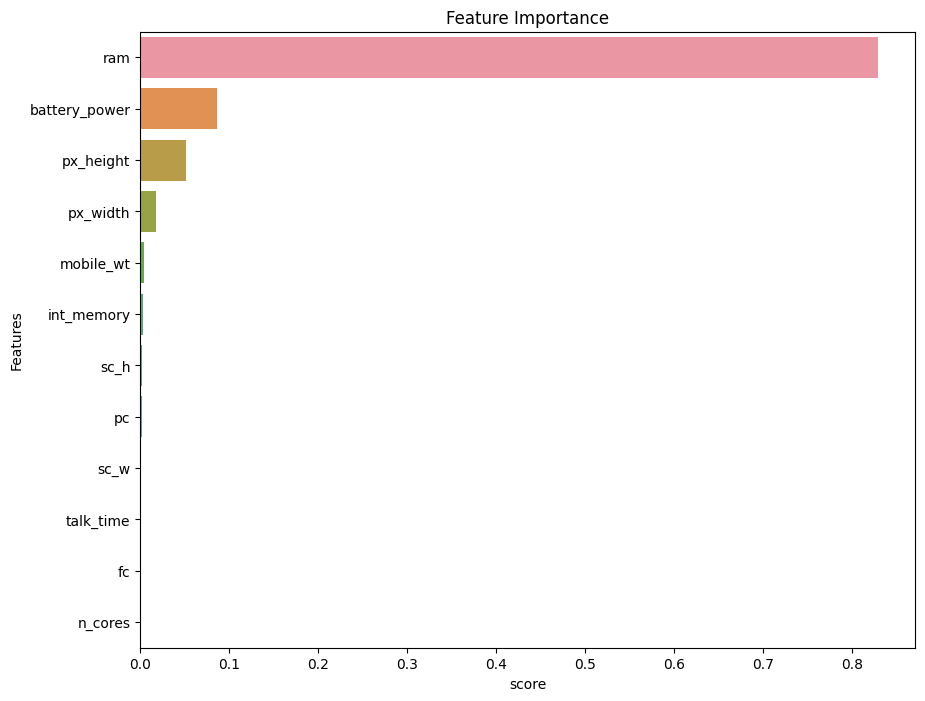

In [ ]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

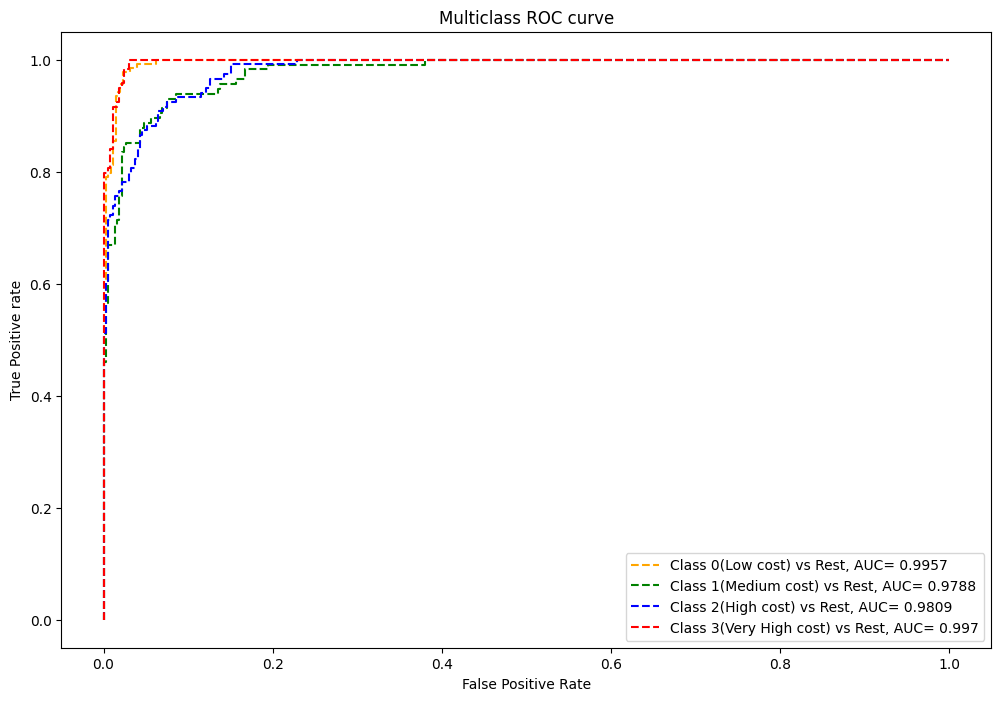

In [ ]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Results of Gradient Boost Classifiers:**

Before tunning:
* Train accuracy score= 100%.
* Test accuracy score= 89%

Model did not generalised well and overfitted the training data. so we tuned hyperparameters of model.

After Hyperparameter Tuning
* Train accuracy score= 100%
* Test accuarcy score=90%

Thus we slightly improved the model performance.However the model is not best.





From ROC curve it's clear that model was good to classify the class 0 and class 3.From the classification report its clear that recall for class 0 and class 3 is also good which is 99.5% and 99.7% respectively.


## **4) K Nearest Neighbors**

With default hyperparameters:

In [ ]:
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train_scaled,y_train)   #  fitting the data

KNeighborsClassifier()

In [ ]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f7011596dd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7029231815091774

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.5173116089613035

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[94, 39,  5,  0],
       [46, 51, 14,  4],
       [13, 45, 47, 14],
       [ 2, 17, 38, 62]])

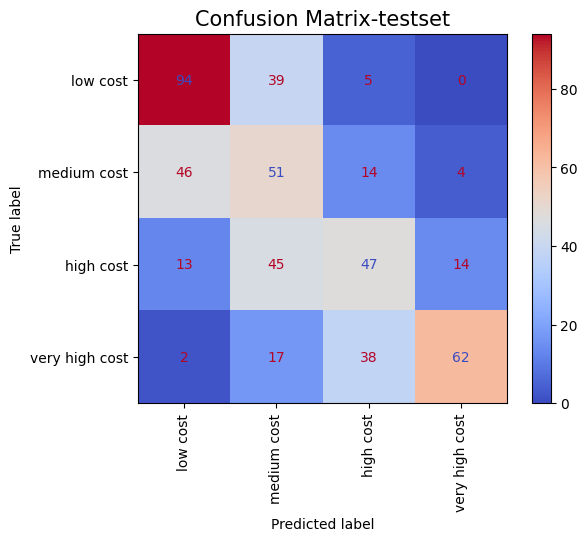

In [ ]:
y_pred = knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')
plt.title('Confusion Matrix-testset', fontsize=15)
plt.show()

In [ ]:
# printing the classification report of test set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79       356
         1.0       0.61      0.63      0.62       376
         2.0       0.64      0.63      0.64       372
         3.0       0.89      0.68      0.77       367

    accuracy                           0.70      1471
   macro avg       0.71      0.70      0.70      1471
weighted avg       0.71      0.70      0.70      1471



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64       138
         1.0       0.34      0.44      0.38       115
         2.0       0.45      0.39      0.42       119
         3.0       0.78      0.52      0.62       119

    accuracy                           0.52       491
   macro avg       0.54      0.51      0.52       491
weighted avg       0.55      0.52      0.52       491



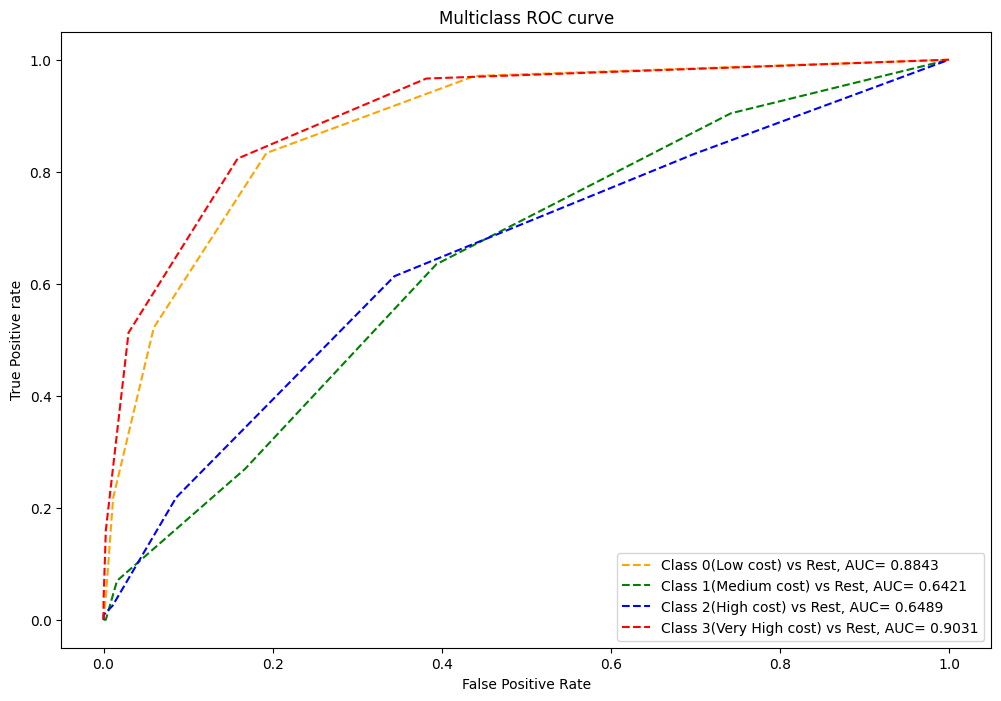

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### HyperParameter tuning.

In [ ]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [ ]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [ ]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.410 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.476 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.401 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.435 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.449 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.397 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.415 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.432 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.432 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.418 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.444 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [ ]:
# getting thge best parameters
knn_tune.best_params_                     # thus  best n_neighnors came out to be 29

{'n_neighbors': 30}

In [ ]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=29)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [ ]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.6770904146838885

In [ ]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.5926680244399185

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[106,  29,   3,   0],
       [ 37,  56,  20,   2],
       [  3,  45,  54,  17],
       [  0,   7,  37,  75]])

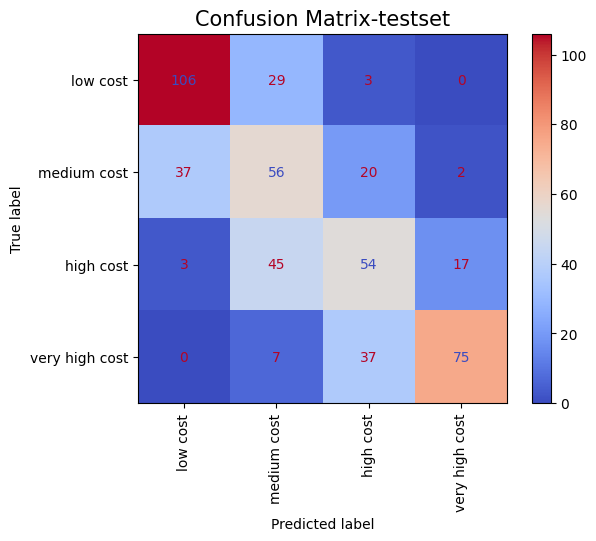

In [ ]:
y_pred = knn_optimal.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')
plt.title('Confusion Matrix-testset', fontsize=15)
plt.show()

In [ ]:
# printig tye classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       356
         1.0       0.59      0.56      0.57       376
         2.0       0.55      0.62      0.58       372
         3.0       0.83      0.68      0.74       367

    accuracy                           0.68      1471
   macro avg       0.69      0.68      0.68      1471
weighted avg       0.68      0.68      0.68      1471



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       138
         1.0       0.41      0.49      0.44       115
         2.0       0.47      0.45      0.46       119
         3.0       0.80      0.63      0.70       119

    accuracy                           0.59       491
   macro avg       0.60      0.58      0.59       491
weighted avg       0.61      0.59      0.60       491



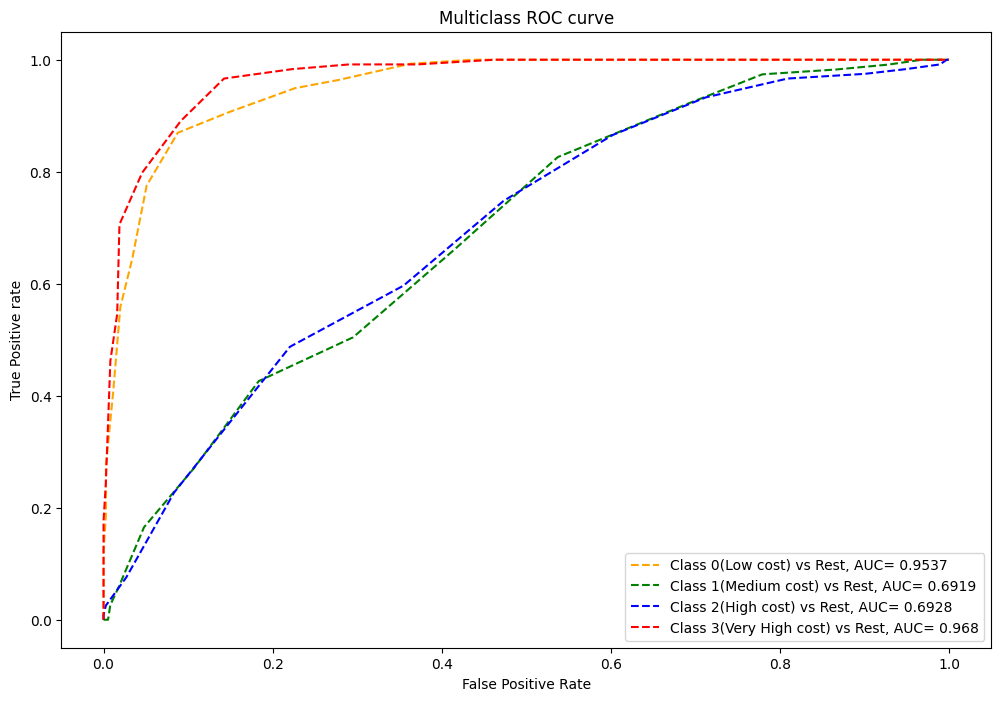

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### **Results:**
***Before hyperparameters tuning:***

* Train Accuracy:70 %
* Test Accuarcy:52 %

Clearly Model has performed very worst. We did hyperparameter tuning

After Hyperparameter Tuning:

* Train Accuarcy: 68%
* Test Accuarcy: 59%

Although we improved the model perfromance and reduced overfitting but however this is not  good model.



## **5) XGBoost Classifier:**

With default hyperparameter

In [ ]:
# spltting the data into train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.8879837067209776

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[128,  10,   0,   0],
       [ 10,  97,   8,   0],
       [  0,  10, 103,   6],
       [  0,   0,  11, 108]])

In [ ]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       138
         1.0       0.83      0.84      0.84       115
         2.0       0.84      0.87      0.85       119
         3.0       0.95      0.91      0.93       119

    accuracy                           0.89       491
   macro avg       0.89      0.89      0.89       491
weighted avg       0.89      0.89      0.89       491



Train accuracy = 100% Test Accuarcy= 89 %

###  Hyperparameter tuning:

In [ ]:
# parameter grid values for GridSearchCv
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [ ]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.890 total time=   1.7s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.898 total time=   1.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.906 total time=   1.6s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.886 total time=   5.2s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.888 total time=   2.1s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.900 total time=   1.7s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.886 total time=   3.0s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.894 total time=   3.1s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [ ]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 1, 'n_estimators': 500, 'subsample': 0.5}

In [ ]:
xgb_opti=XGBClassifier(learning_rate=.6,gamma=0.2,n_estimators=1000,subsample=0.5)
xgb_opti.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [ ]:
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
accuracy_score(y_test,y_pred)

0.9083503054989817

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[132,   6,   0,   0],
       [ 10,  99,   6,   0],
       [  0,  11, 103,   5],
       [  0,   0,   7, 112]])

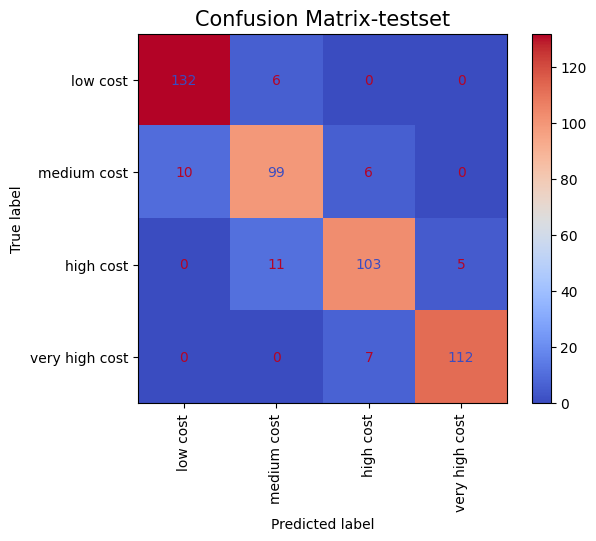

In [ ]:
y_pred = xgb_opti.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')
plt.title('Confusion Matrix-testset', fontsize=15)
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [ ]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       138
         1.0       0.85      0.86      0.86       115
         2.0       0.89      0.87      0.88       119
         3.0       0.96      0.94      0.95       119

    accuracy                           0.91       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.91      0.91      0.91       491



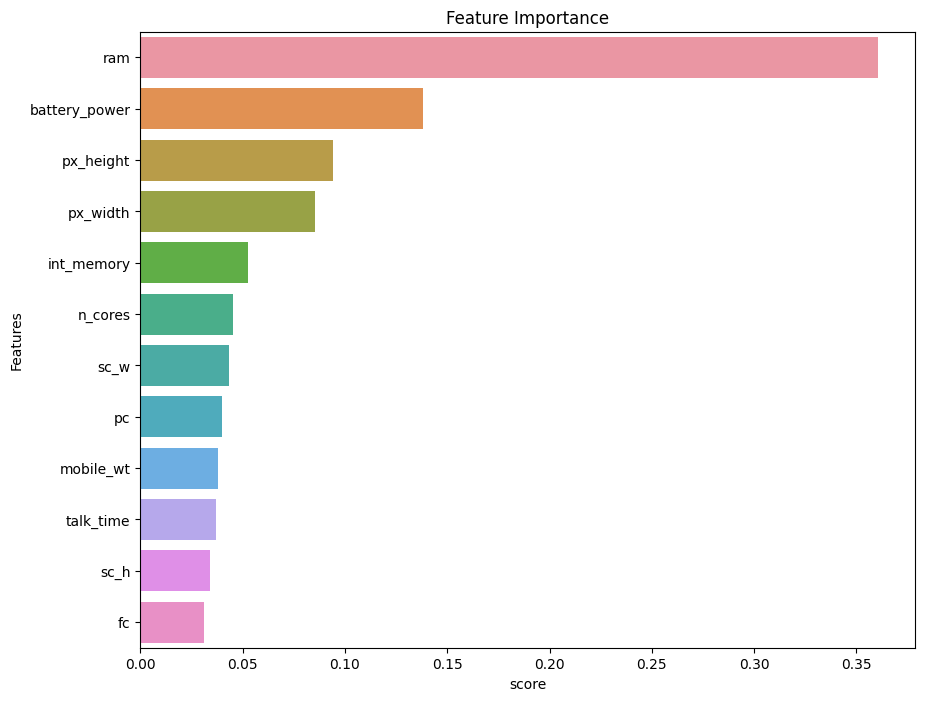

In [ ]:
#plotting feature importances
plot_feature_importance(xgb_opti)

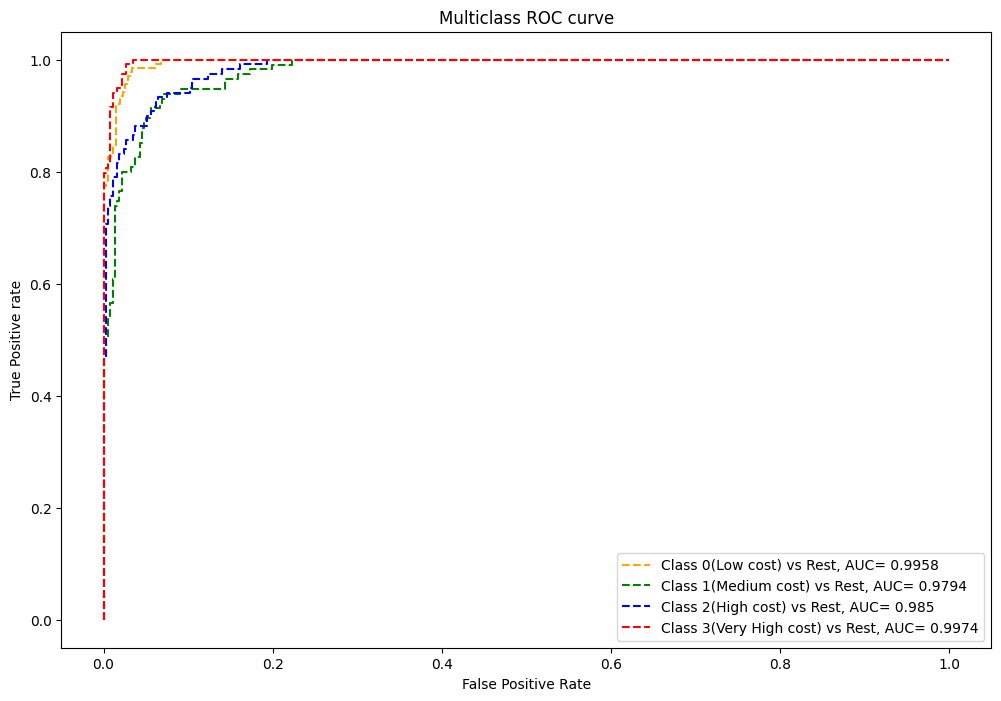

In [ ]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Results**

***Before hyperparameter Tuning***
* ***Train Accuarcy = 100%***
* ***Test Accuarcy = 89%***

***After hyperparameter Tuning***
* ***Train Accuarcy = 100%***
* ***Test Accuarcy = 91%***

***we have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 91%.But still the difference of accuracy score between train and test is  more than 5%.We can say model is very slightly overfitted***

***From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.***


## 6) SVM

with default parameters.

In [ ]:
# Import all relevant libraries
from sklearn.svm import SVC

svc = SVC(random_state= 1)      # creating an object of classifier
svc.fit(X_train_scaled,y_train)    # fitting the model/training the model.

SVC(random_state=1)

In [ ]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)


In [ ]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9891230455472467

In [ ]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.8778004073319755

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[127,  11,   0,   0],
       [ 13,  95,   7,   0],
       [  0,  16,  97,   6],
       [  0,   0,   7, 112]])

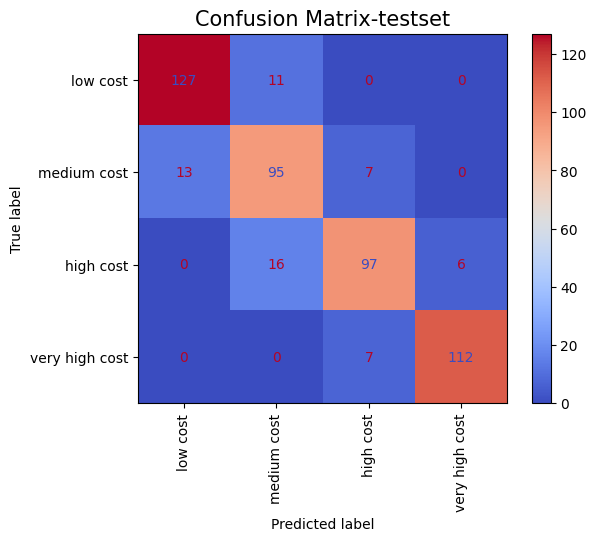

In [ ]:
y_pred = svc.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')
plt.title('Confusion Matrix-testset', fontsize=15)
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       356
         1.0       0.98      0.99      0.99       376
         2.0       0.98      0.99      0.99       372
         3.0       0.99      0.99      0.99       367

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       138
         1.0       0.78      0.83      0.80       115
         2.0       0.87      0.82      0.84       119
         3.0       0.95      0.94      0.95       119

    accuracy                           0.88       491
   macro avg       0.88      0.88      0.88       491
weighted avg       0.88      0.88      0.88       491



### Hyperparameter Tuning

In [ ]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [ ]:
# creating an object for classifier
svm  = SVC ()

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [ ]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train_scaled,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train_scaled)
y_pred=svm_optimal.predict(X_test_scaled)

In [ ]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.9674134419551935

In [ ]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[138,   0,   0,   0],
       [  2, 107,   6,   0],
       [  0,   5, 112,   2],
       [  0,   0,   1, 118]])

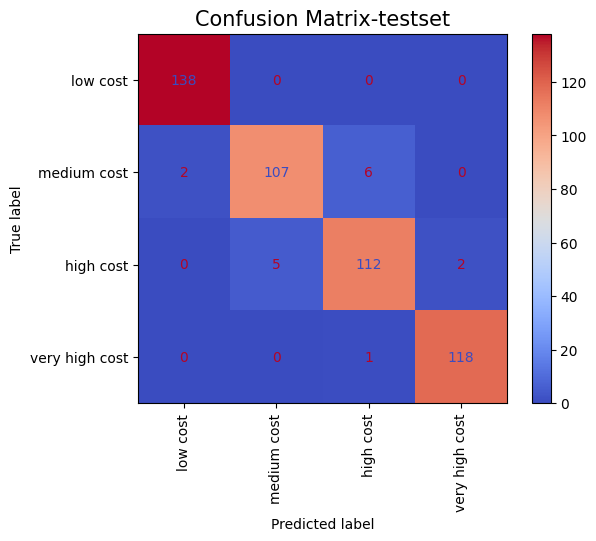

In [ ]:
y_pred = svm_optimal.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_cat)
cmd.plot(cmap='coolwarm', xticks_rotation='vertical')
plt.title('Confusion Matrix-testset', fontsize=15)
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       356
         1.0       0.99      0.97      0.98       376
         2.0       0.96      0.99      0.97       372
         3.0       0.99      0.98      0.98       367

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       138
         1.0       0.96      0.93      0.94       115
         2.0       0.94      0.94      0.94       119
         3.0       0.98      0.99      0.99       119

    accuracy                           0.97       491
   macro avg       0.97      0.97      0.97       491
weighted avg       0.97      0.97      0.97       491



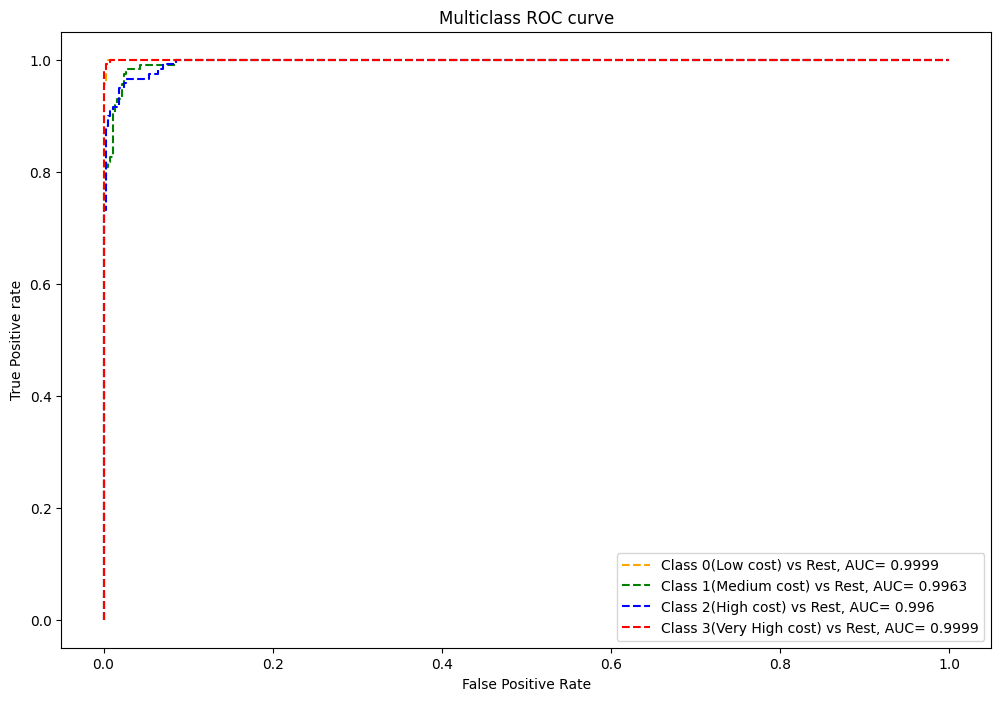

In [ ]:
# Plot AUC ROC curve.
pred_prob = svm_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### **Results**


* ***Accuracy score on train set is 99% and Test score is 88%.***
***Model seems to be overfitted as the differance between train and test accuracy score is almot 100%.***
* ***After Hyperparameter tuning train accuracy remained almost same  98% and test accuracy score increased to 97%.***
*  ***SVM performed very well as compared to other alogorithms.***
* ***In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.***
* ***f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 100%***

===============================================================================================